In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings('ignore')
os.listdir()

['.ipynb_checkpoints',
 'data.parquet',
 'test.parquet',
 'Ï†úÏ∂úÏö©_EDA.ipynb',
 'ÌÅ¨Î°§ÎßÅ_Ïó≠Ï£ºÏÜå.ipynb']

In [3]:
df = pd.read_parquet('data.parquet')
df.head()

TM  Line  station_number station_name  Direction  STN  \
0 2021-01-01 00:00:00     1             150          ÏÑúÏö∏Ïó≠          0  419   
1 2021-01-01 01:00:00     1             150          ÏÑúÏö∏Ïó≠          0  419   
2 2021-01-01 05:00:00     1             150          ÏÑúÏö∏Ïó≠          0  419   
3 2021-01-01 06:00:00     1             150          ÏÑúÏö∏Ïó≠          0  419   
4 2021-01-01 07:00:00     1             150          ÏÑúÏö∏Ïó≠          0  419   

      TA      WD    WS  RN_DAY  ...  sin_dow  cos_dow  sin_dom  cos_dom  \
0 -9.600 291.100 3.300   0.000  ...   -0.434   -0.901    0.201    0.980   
1 -9.700 284.600 2.000   0.000  ...   -0.434   -0.901    0.201    0.980   
2 -9.300 124.700 2.400   0.000  ...   -0.434   -0.901    0.201    0.980   
3 -9.300 126.200 1.700   0.000  ...   -0.434   -0.901    0.201    0.980   
4 -9.100 145.700 1.300   0.000  ...   -0.434   -0.901    0.201    0.980   

   sin_wom  cos_wom  sin_woy cos_woy  sin_doy  cos_doy  
0    0.951    0.309    0.121   0.993    0.017    1.000  
1    0.951    0.309    0.121   0.993    0.017    1.000  
2    0.951    0.309    0.121   0.993    0.017    1.000  
3    0.951    0.309    0.121   0.993    0.017    1.000  
4    0.951    0.309    0.121   0.993    0.017    1.000  

[5 rows x 43 columns]

In [4]:
df.groupby(['year', 'month', 'day']).value_counts()

year  month  day  TM                   Line  station_number  station_name  Direction  STN  TA      WD       WS     RN_DAY  RN_HR1  HM      ta_chi   Congestion  Ïã†ÏÑ§Ïó≠  Ïã†Í∑úÍ¥ÄÏ∏°ÏÜå  transfer  address  hour  weekday  week_of_month  week_of_year  day_of_year  is_holiday  is_day_before_holiday  is_day_after_holiday  is_weekend  time_period  sin_hod  cos_hod  sin_dow  cos_dow  sin_dom  cos_dom  sin_wom  cos_wom  sin_woy  cos_woy  sin_doy  cos_doy
0     0      0    2021-01-01 00:00:00  1     150             ÏÑúÏö∏Ïó≠           0          419  -9.600  291.100  3.300  0.000   0.000   47.500  -12.600  0.000       0    0      5         Ï§ëÍµ¨       0     4        1              53            1            1           1                      0                     0           0            0.000    1.000    -0.434   -0.901   0.201    0.980    0.951    0.309    0.121    0.993    0.017    1.000      1
                                                                           1          419  -9.6

In [3]:
df.columns

Index(['TM', 'Line', 'station_number', 'station_name', 'Direction', 'STN',
       'TA', 'WD', 'WS', 'RN_DAY', 'RN_HR1', 'HM', 'ta_chi', 'Congestion',
       'Ïã†ÏÑ§Ïó≠', 'Ïã†Í∑úÍ¥ÄÏ∏°ÏÜå', 'transfer', 'address', 'year', 'month', 'day', 'hour',
       'weekday', 'week_of_month', 'week_of_year', 'day_of_year', 'is_holiday',
       'is_day_before_holiday', 'is_day_after_holiday', 'is_weekend',
       'time_period', 'sin_hod', 'cos_hod', 'sin_dow', 'cos_dow', 'sin_dom',
       'cos_dom', 'sin_wom', 'cos_wom', 'sin_woy', 'cos_woy', 'sin_doy',
       'cos_doy'],
      dtype='object')

# Ï≤´ EDA

In [5]:
cond = df['Line']==2
df.loc[cond,'Direction'].unique()

array([3, 2], dtype=int8)

In [8]:
print('ÎÇ¥ÏÑ†Ïô∏ÏÑ†ÏùÄ 2Ìò∏ÏÑ†ÏóêÎßå Ï°¥Ïû¨ÌïòÎ©∞ 2Ìò∏ÏÑ†ÏóêÎäî ÎÇ¥ÏÑ†, Ïô∏ÏÑ†Îßå Ï°¥Ïû¨')

ÎÇ¥ÏÑ†Ïô∏ÏÑ†ÏùÄ 2Ìò∏ÏÑ†ÏóêÎßå Ï°¥Ïû¨ÌïòÎ©∞ 2Ìò∏ÏÑ†ÏóêÎäî ÎÇ¥ÏÑ†, Ïô∏ÏÑ†Îßå Ï°¥Ïû¨


In [10]:
en_cols = list(set(df.columns)-set(df.select_dtypes(np.number).columns))

from sklearn.preprocessing import LabelEncoder
for col in en_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [11]:
df.columns

Index(['TM', 'Line', 'station_number', 'station_name', 'Direction', 'STN',
       'TA', 'WD', 'WS', 'RN_DAY', 'RN_HR1', 'HM', 'ta_chi', 'Congestion',
       'Ïã†ÏÑ§Ïó≠', 'Ïã†Í∑úÍ¥ÄÏ∏°ÏÜå', 'transfer', 'address', 'year', 'month', 'day', 'hour',
       'weekday', 'week_of_month', 'week_of_year', 'day_of_year', 'is_holiday',
       'is_day_before_holiday', 'is_day_after_holiday', 'is_weekend',
       'time_period', 'sin_hod', 'cos_hod', 'sin_dow', 'cos_dow', 'sin_dom',
       'cos_dom', 'sin_wom', 'cos_wom', 'sin_woy', 'cos_woy', 'sin_doy',
       'cos_doy'],
      dtype='object')

In [23]:
import seaborn as sns

# 1) ÏãúÍ≥ÑÏó¥ Î≥ÄÏàò
ÏãúÍ≥ÑÏó¥Î≥ÄÏàò = [
    'day', 'day_of_year', 'hour', 'month',
    'week_of_month', 'week_of_year', 'weekday', 'year'
]

# 2) ÏÇºÍ∞Å Î≥ÄÏàò
ÏÇºÍ∞ÅÎ≥ÄÏàò = [
    'sin_dom', 'cos_dom',
    'sin_dow', 'cos_dow',
    'sin_hod', 'cos_hod',
    'sin_wom', 'cos_wom',
    'sin_woy', 'cos_woy',
    'sin_doy', 'cos_doy'
]

# 3) Ìú¥Ïùº¬∑Ï£ºÎßê Î≥ÄÏàò
Ìú¥ÏùºÏ£ºÎßêÎ≥ÄÏàò = [
    'is_day_before_holiday',
    'is_day_after_holiday',
    'is_holiday',
    'is_weekend'
]

# 4) ÏãúÍ∞ÑÎåÄ Î≥ÄÏàò
ÏãúÍ∞ÑÎåÄÎ≥ÄÏàò = ['time_period']

# 5) ÏßÄÌïòÏ≤† Î≥ÄÏàò
ÏßÄÌïòÏ≤†Î≥ÄÏàò = ['transfer', 'address','Direction', 'Line', 'STN', 'station_name', 'station_number', 'Ïã†ÏÑ§Ïó≠', 'Ïã†Í∑úÍ¥ÄÏ∏°ÏÜå']

# 6) Í∏∞ÏÉÅÎ≥ÄÏàò
Í∏∞ÏÉÅÎ≥ÄÏàò =  ['HM', 'RN_DAY', 'RN_HR1','TA', 'TM', 'WD','WS','ta_chi']

corr_ÏãúÍ≥ÑÏó¥   = df[ÏãúÍ≥ÑÏó¥Î≥ÄÏàò   + ['Congestion']].corr()
corr_ÏÇºÍ∞Å     = df[ÏÇºÍ∞ÅÎ≥ÄÏàò     + ['Congestion']].corr()
corr_Ìú¥ÏùºÏ£ºÎßê = df[Ìú¥ÏùºÏ£ºÎßêÎ≥ÄÏàò + ['Congestion']].corr()
corr_ÏãúÍ∞ÑÎåÄ   = df[ÏãúÍ∞ÑÎåÄÎ≥ÄÏàò   + ['Congestion']].corr()
corr_Í∏∞ÏÉÅ     = df[Í∏∞ÏÉÅÎ≥ÄÏàò     + ['Congestion']].corr()
corr_ÏßÄÌïòÏ≤† = df['address transfer  Congestion'.split()].corr()

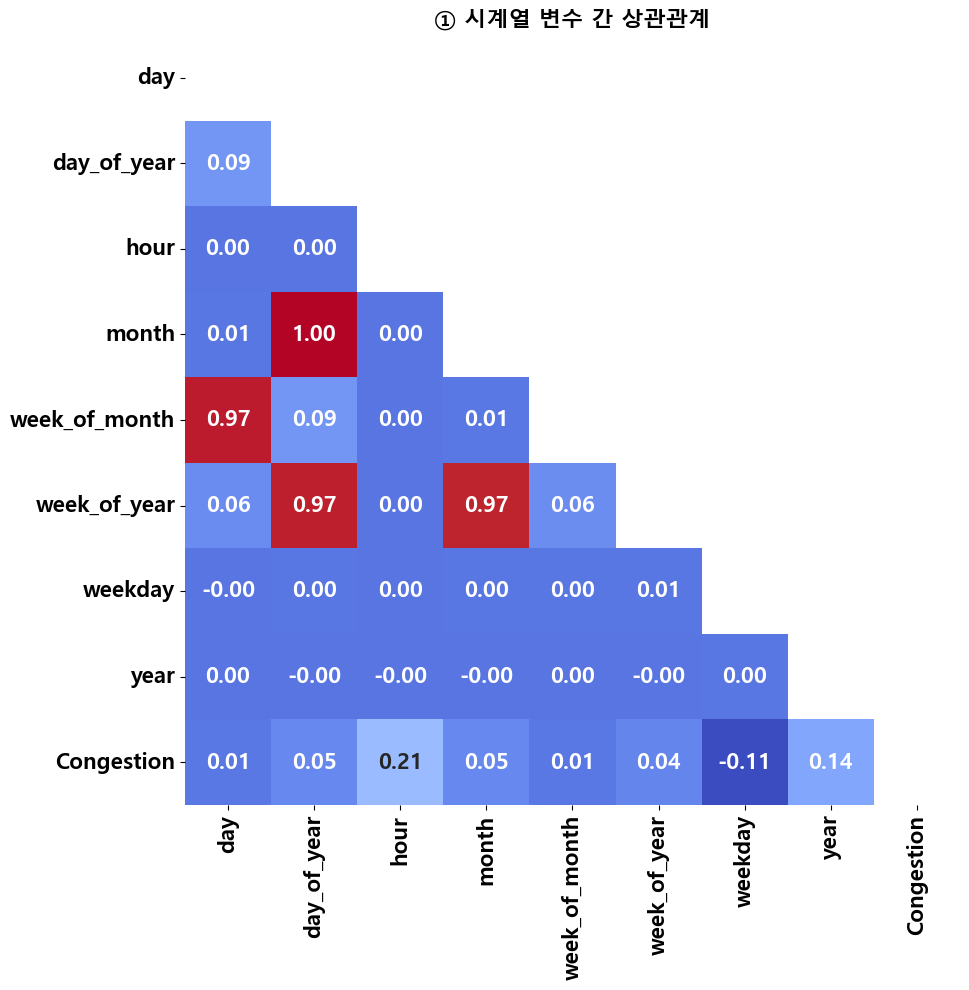

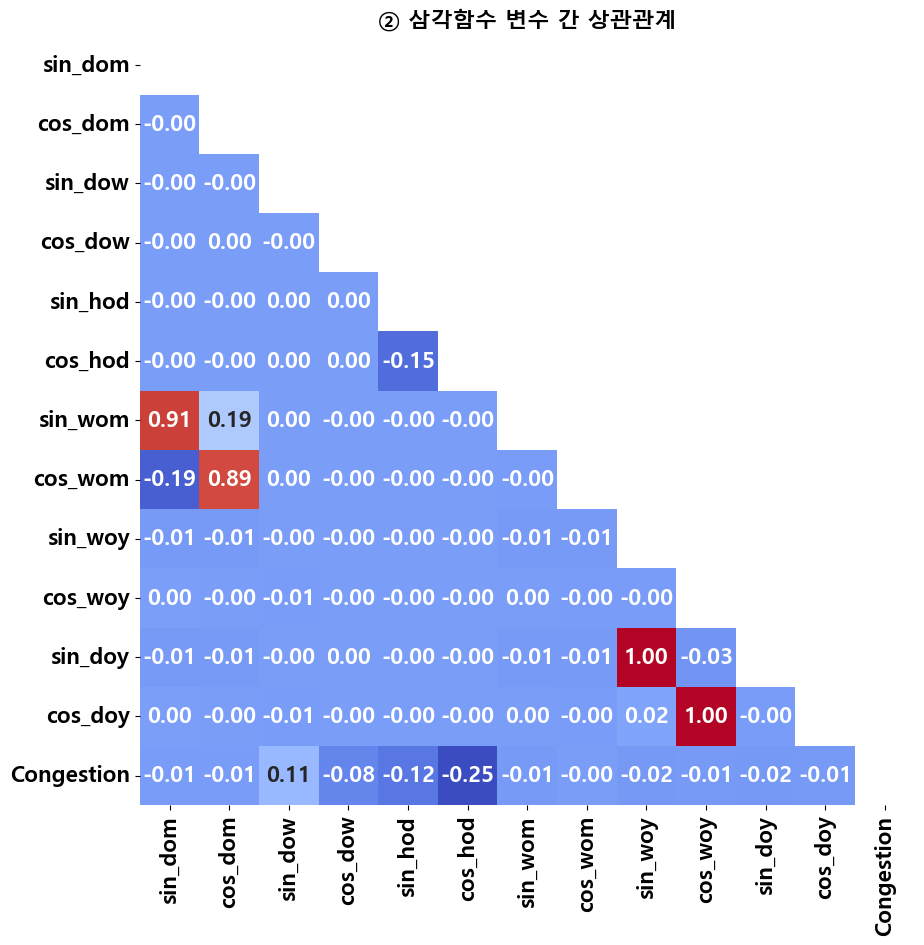

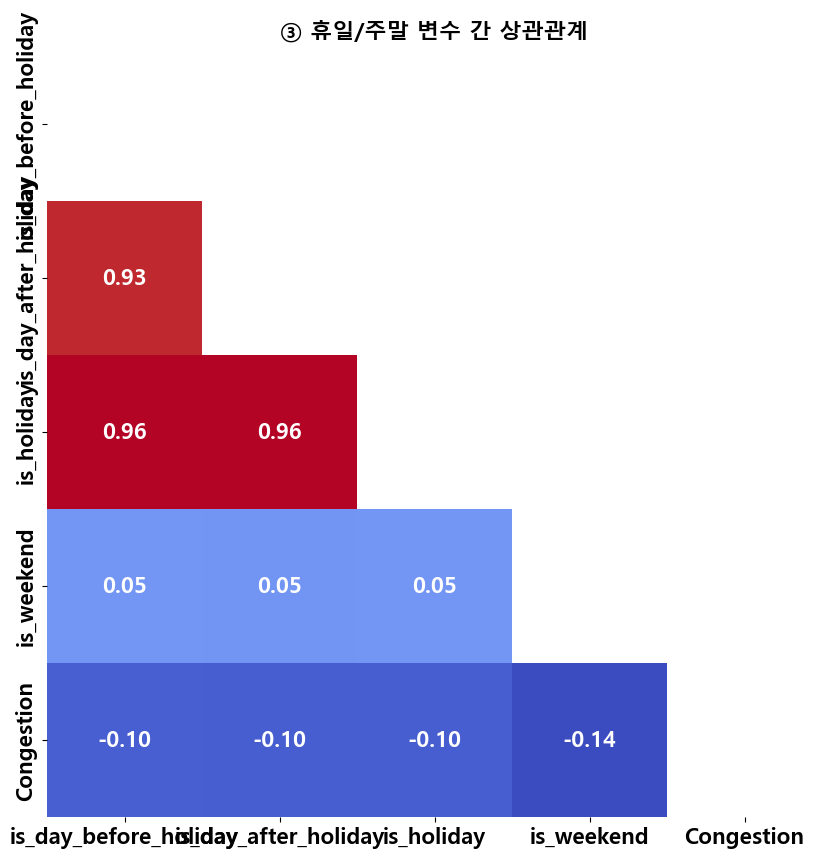

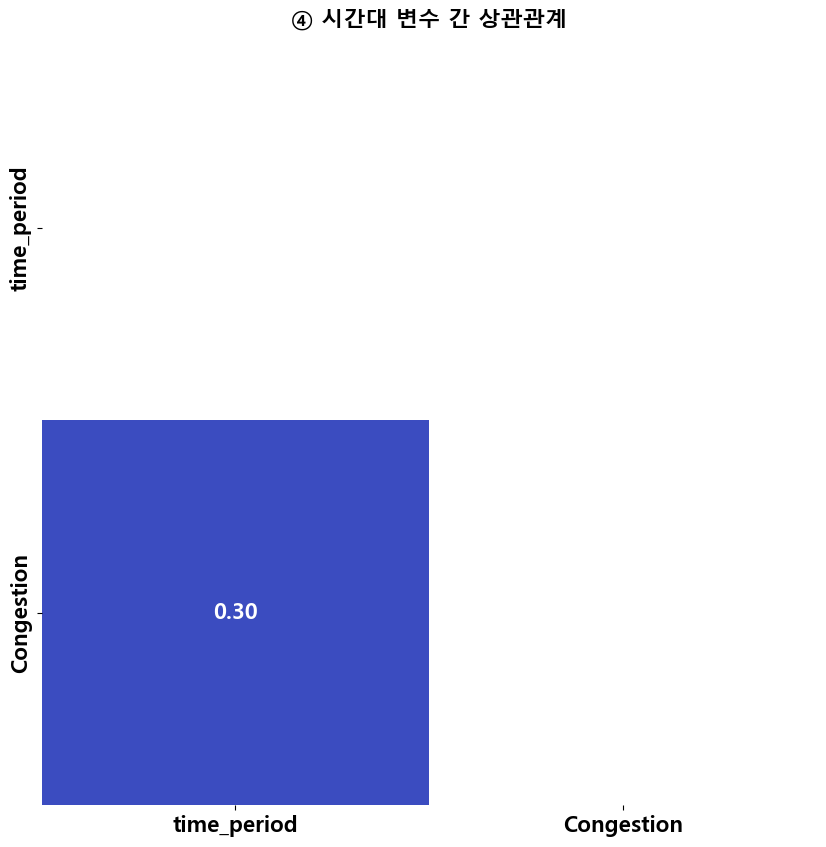

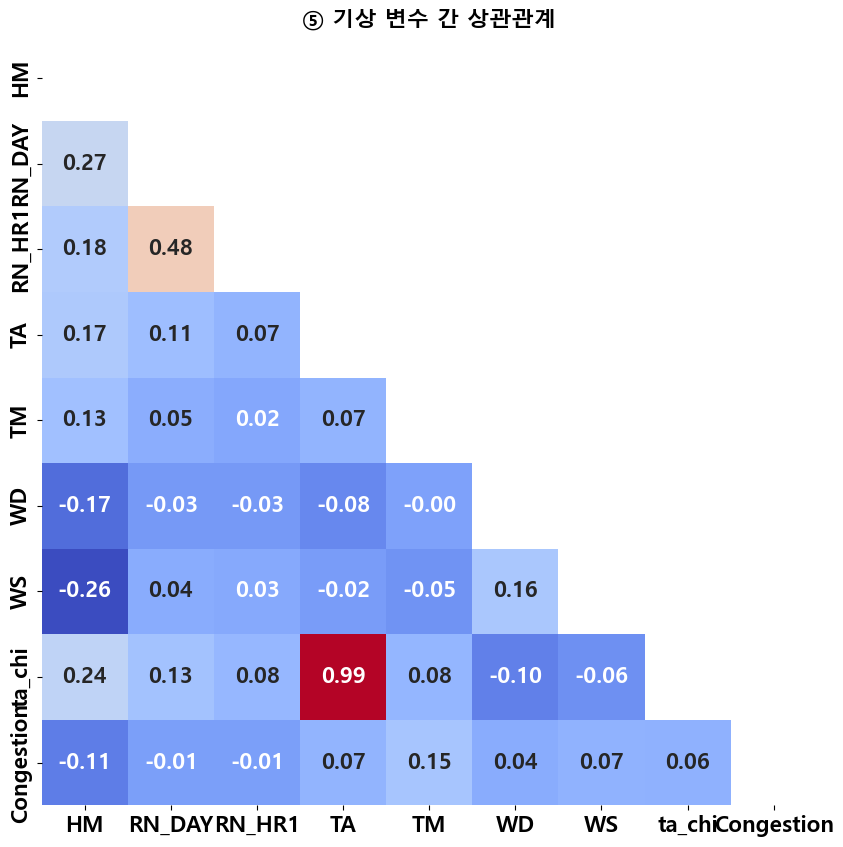

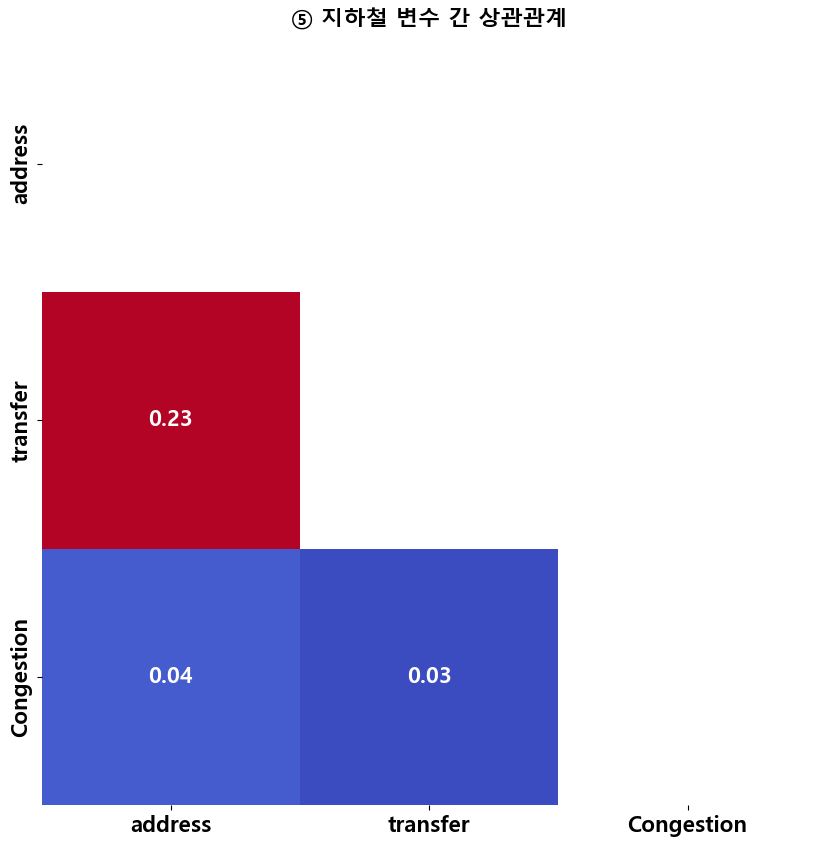

In [25]:
# ‚ë† ÏãúÍ≥ÑÏó¥ Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
plot_corr_heatmap(corr_ÏãúÍ≥ÑÏó¥, "‚ë† ÏãúÍ≥ÑÏó¥ Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=16)

# ‚ë° ÏÇºÍ∞ÅÌï®Ïàò Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
plot_corr_heatmap(corr_ÏÇºÍ∞Å, "‚ë° ÏÇºÍ∞ÅÌï®Ïàò Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=16)

# ‚ë¢ Ìú¥Ïùº/Ï£ºÎßê Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
plot_corr_heatmap(corr_Ìú¥ÏùºÏ£ºÎßê, "‚ë¢ Ìú¥Ïùº/Ï£ºÎßê Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=16)

# ‚ë£ ÏãúÍ∞ÑÎåÄ Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
plot_corr_heatmap(corr_ÏãúÍ∞ÑÎåÄ, "‚ë£ ÏãúÍ∞ÑÎåÄ Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=16)

# ‚ë§ Í∏∞ÏÉÅ Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
plot_corr_heatmap(corr_Í∏∞ÏÉÅ, "‚ë§ Í∏∞ÏÉÅ Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=16)

# ‚ë§ ÏßÄÌïòÏ≤† Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
plot_corr_heatmap(corr_ÏßÄÌïòÏ≤†, "‚ë§ ÏßÄÌïòÏ≤† Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=16)

- ÏãúÍ≥ÑÏó¥ Î≥ÄÏàò -> hour 0.21, year 0.14, weekday -0.11Ïù¥ Í∞ÄÏû• ÌÅ∞ ÏÉÅÍ¥ÄÏÑ±
- ÏÇºÍ∞ÅÌï®Ïàò Î≥ÄÏàò -> cos_hod -0.25, sin_hod -0.12, sin_dow 0.11,  , cos_dow -0.08 Ïàú
- Ìú¥Ïùº/Ï£ºÎßê Î≥ÄÏàò ->  is_weekend -0.14, is_holiday -0.1, is_day_before_holiday -0.1, is_day_after_holiday -0.1 -> Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÌÅ∞ ÏÉÅÍ¥ÄÏÑ±
- ÏãúÍ∞ÑÎåÄ Î≥ÄÏàò -> time_period 0.3


- Ìò∏ÏÑ†Í≥º ÌòºÏû°ÎèÑÎäî ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä 0...? -> Ìò∏ÏÑ†Ïóê Îî∞Îùº ÌòºÏû°ÎèÑÍ∞Ä ÏÉùÍ∞ÅÎ≥¥Îã§ ÌÅ¨ÏßÄ ÏïäÏùÑ ÏàòÎèÑ, Ïó≠Î≤àÌò∏Îäî Ï∞®Ïù¥Î•º Î≥¥ÏûÑ- ÏöîÏùº, Ìú¥ÏùºÏó¨Î∂Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌòºÏû°ÎèÑÏôÄ ÍΩ§ ÏÉÅÍ¥ÄÏÑ± ÌÅº
[Ïõî]
- Í∏∞Ïò®, ÏÉÅÎåÄÏäµÎèÑ, Ï≤¥Í∞êÏò®ÎèÑ, ÎØ∏ÏÑ∏Î®ºÏßÄ ÎààÏóê ÎùÑÎäî ÏÉÅÍ¥ÄÏÑ±
[ÏãúÍ∞Ñ]
- ÏÉÅÎåÄÏäµÎèÑ, ÏùºÏÇ¨Îüâ, Ï≤¥Í∞êÏò®ÎèÑ, ,ÌíçÌñ•, ÌíçÏÜç, Í∏∞Ïò® Ï∞®Ïù¥
- ÏãúÍ∞Ñ_cosÏùÄ ÏùºÏÇ¨ÎüâÍ≥º Îß§Ïö∞ ÏÉÅÍ¥ÄÏÑ± Ïª§Ïßê.
- ÏãúÍ∞ÑÏùÄ Í∑∏ÎÉ• ÏãúÍ∞ÑÎ≥¥Îã§ sin, cosÌïú Í≤å Îã§Î•∏ Ïª¨ÎüºÎì§Í≥º ÏÉÅÍ¥ÄÏÑ±Ïù¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎÜíÏïÑÏÑú Í∑∏ÎÉ• ÏãúÍ∞ÑÎ≥¥Îã§Îäî sin, cosÏùÑ Ïì∞Î©¥ Îê† ÎìØ
[Ìò∏ÏÑ†]
- ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò, ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò, ÏÉÅÌïòÍµ¨Î∂Ñ, Ïó≠Î≤àÌò∏ Ï∞®Ïù¥
- Ïó≠Î≤àÌò∏Í∞Ä Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ìò∏ÏÑ†Î≥¥Îã§ Îçî Í∞ïÌïú ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Î≥¥ÏòÄÎäîÎç∞, ÌëúÌòÑÏÉÅ Ïñ¥Îäê Í≤å Ìé∏ÌïúÏßÄ, Ïó≠Î≤àÌò∏ÎßåÏúºÎ°úÎèÑ Í¥ëÍ≥†Ïóê ÌôúÏö©Ìï† Ïàò ÏûàÎäîÏßÄ ÌôïÏù∏ ÌïÑÏöî
[ÏÉÅÌïòÍµ¨Î∂Ñ] - Ï¢Ä Ïì∏Î™®ÏóÜÏñ¥Î≥¥ÏûÑ Ïó≠Î≤àÌò∏, Ìò∏ÏÑ†, ÌïòÏ∞®, ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò, ÌòºÏû°ÎèÑ(-0.05) Ïù¥ÎûëÎßå ÏÉÅÍ¥ÄÏÑ± Î≥¥ÏûÑ
[Í∏∞Ïò®]
- ÎØ∏ÏÑ∏Î®ºÏßÄ, Ï≤¥Í∞êÏò®ÎèÑ, ÏùºÏÇ¨Îüâ, ÏÉÅÎåÄÏäµÎèÑ, ÏùºÍ∞ïÏàòÎüâ, ÌíçÌñ•, ÏãúÍ∞Ñ, ÏõîÍ≥º Ïó∞Í¥Ä
[ÌíçÌñ•&ÌíçÏÜç]
- ÏÉÅÎåÄÏäµÎèÑÏôÄ ÌÅ∞ Ïó∞Í¥Ä, ÏÑúÎ°ú Ïó∞Í¥ÄÏûàÏùå. ÏãúÍ∞Ñ_sinÍ≥º Ïó∞Í¥Ä
[ÏùºÍ∞ïÏàòÎüâ]
ÏãúÍ∞ÑÍ∞ïÏàòÎüâÏù¥Îûë ÎπÑÏä∑ÌïúÎç∞ Îçî Í∞ïÌïú ÏÉÅÍ¥ÄÏÑ±
- ÎØ∏ÏÑ∏Î®ºÏßÄ, Ï≤¥Í∞êÏò®ÎèÑ, ÏùºÏÇ¨Îüâ, ÏÉÅÎåÄÏäµÎèÑ, ÏãúÍ∞ÑÍ∞ïÏàòÎüâ, Í∏∞Ïò®
[ÏÉÅÎåÄÏäµÎèÑ]


## üìä Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏöîÏïΩ

### üéØ ÌÉÄÍ≤ü: `ÌòºÏû°ÎèÑ`ÏôÄ Ï£ºÏöî Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

| Î≥ÄÏàòÎ™Ö          | ÏÉÅÍ¥ÄÍ≥ÑÏàò      | Ìï¥ÏÑù                               |
| ------------ | --------- | -------------------------------- |
| `Ï≤¥Í∞êÏò®ÎèÑ`       | **0.21**  | Í∏∞Ïò®Ïù¥ ÎÜíÍ±∞ÎÇò Ï≤¥Í∞êÏò®ÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÌòºÏû°ÎèÑ ÏïΩÍ∞Ñ Ï¶ùÍ∞Ä Í≤ΩÌñ•  |
| `ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò`     | **0.23**  | ÏäπÏ∞® Ïù∏ÏõêÏù¥ ÎßéÏùÑÏàòÎ°ù ÌòºÏû°ÎèÑ Ï¶ùÍ∞Ä               |
| `ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò`     | **0.22**  | ÌïòÏ∞® Ïù∏ÏõêÏù¥ ÎßéÏùÑÏàòÎ°ù ÌòºÏû°ÎèÑ Ï¶ùÍ∞Ä               |
| `ÎØ∏ÏÑ∏Î®ºÏßÄ`       | **-0.24** | ÎØ∏ÏÑ∏Î®ºÏßÄÍ∞Ä Ïã¨Ìï†ÏàòÎ°ù ÌòºÏû°ÎèÑ Îã§ÏÜå Í∞êÏÜå (Ïã§ÎÇ¥ Ïù¥Îèô ÏÑ†Ìò∏?) |
| `ÎØ∏ÏÑ∏Î®ºÏßÄ_level` | **-0.27** | Íµ¨Í∞ÑÌôîÎêú ÎØ∏ÏÑ∏Î®ºÏßÄ ÏàòÏ§ÄÏù¥ ÎÜíÏùÑÏàòÎ°ù ÌòºÏû°ÎèÑ ÎÇÆÏïÑÏßê       |
| `ÏÉÅÎåÄÏäµÎèÑ`       | **-0.13** | ÏäµÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÌòºÏû°ÎèÑÎäî Îã§ÏÜå Í∞êÏÜå              |

---

### üîç ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÏåç

| Î≥ÄÏàòÏåç                   | ÏÉÅÍ¥ÄÍ≥ÑÏàò      | Ìï¥ÏÑù                                         |
| --------------------- | --------- | ------------------------------------------ |
| `Í∏∞Ïò®` ‚Üî `Ï≤¥Í∞êÏò®ÎèÑ`         | **0.99**  | Í±∞Ïùò ÏôÑÏ†ÑÌïú ÏñëÏùò ÏÉÅÍ¥Ä (Ï§ëÎ≥µ Í∞ÄÎä•ÏÑ±)                      |
| `ÏùºÍ∞ïÏàòÎüâ` ‚Üî `ÏãúÍ∞ÑÍ∞ïÏàòÎüâ`      | **1.00**  | Ï§ëÎ≥µÎêú Îç∞Ïù¥ÌÑ∞, ÌïòÎÇò Ï†úÍ±∞ Í∞ÄÎä•                          |
| `Ïó≠Î≤àÌò∏` ‚Üî `Ìò∏ÏÑ†`          | **0.72**  | Ìò∏ÏÑ†Í≥º Ïó≠Î≤àÌò∏ Í∞Ñ Í∞ïÌïú ÏÉÅÍ¥Ä (ÏßÄÏó≠Ï†Å ÌäπÏÑ± Î∞òÏòÅ)                |
| `ÎØ∏ÏÑ∏Î®ºÏßÄ` ‚Üî `ÎØ∏ÏÑ∏Î®ºÏßÄ_level` | **-0.72** | ÏõêÎ≥∏Í≥º Íµ¨Í∞ÑÌôîÎêú Î≥ÄÏàòÎäî ÏùåÏùò ÏÉÅÍ¥Ä (Íµ¨Í∞Ñ Î†àÎ≤®Ïù¥ ÌÅ¥ÏàòÎ°ù ÏàòÏπòÎäî ÏûëÍ≤å ÌëúÏãúÎê®) |

---

### ‚ö†Ô∏è Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÏùòÏã¨ Î≥ÄÏàò (ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.8 Ïù¥ÏÉÅ)

* `Í∏∞Ïò®`Í≥º `Ï≤¥Í∞êÏò®ÎèÑ` (0.99)
* `ÏùºÍ∞ïÏàòÎüâ`Í≥º `ÏãúÍ∞ÑÍ∞ïÏàòÎüâ` (1.00)

  * ‚Üí Îëê Î≥ÄÏàò Ï§ë ÌïòÎÇò Ï†úÍ±∞ Í∂åÏû•
* `ÎØ∏ÏÑ∏Î®ºÏßÄ`ÏôÄ `ÎØ∏ÏÑ∏Î®ºÏßÄ_level` (‚Äì0.72Î°ú ÏÉÅÍ¥Ä Í∞ïÌï®)

  * ‚Üí Î™®Îç∏ÎßÅ Î™©Ï†ÅÏóê Îî∞Îùº Îëò Ï§ë ÌïòÎÇò ÏÑ†ÌÉù

---

### üí° ÏãúÏÇ¨Ï†ê

* `Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞(Í∏∞Ïò®, Ï≤¥Í∞êÏò®ÎèÑ, ÎØ∏ÏÑ∏Î®ºÏßÄ)`ÏôÄ `ÌòºÏû°ÎèÑ` ÏÇ¨Ïù¥Ïóê ÏùºÏ†ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï°¥Ïû¨
* `ÏäπÏ∞®/ÌïòÏ∞® Ïù∏Ïõê`ÏùÄ ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ ÏùòÎØ∏ ÏûàÎäî ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Î©∞ Ï£ºÏöî ÏòàÏ∏° Î≥ÄÏàòÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•
* `Ïó≠Î≤àÌò∏`, `Ìò∏ÏÑ†` Îì±ÏùÄ ÏúÑÏπò Ï†ïÎ≥¥Î•º Î∞òÏòÅÌïòÎ©∞ Ï§ëÎ≥µ ÎòêÎäî ÎåÄÌëú Î≥ÄÏàò ÏÑ†ÌÉù ÌïÑÏöî

# ÌÜµÍ≥ÑÏ†Å Í∞ÄÏÑ§ Í≤ÄÏ†ï

In [6]:
df.columns

Index(['Ïó∞ÏõîÏùº', 'ÎÖÑ', 'Ïõî', 'ÏãúÍ∞Ñ', 'ÏãúÍ∞Ñ_sin', 'ÏãúÍ∞Ñ_cos', 'Ìò∏ÏÑ†', 'Ïó≠Î≤àÌò∏', 'Ïó≠Î™Ö', 'ÏÉÅÌïòÍµ¨Î∂Ñ',
       'AWSÏßÄÏ†êÏΩîÎìú', 'Í∏∞Ïò®', 'ÌíçÌñ•', 'ÌíçÏÜç', 'ÏùºÍ∞ïÏàòÎüâ', 'ÏãúÍ∞ÑÍ∞ïÏàòÎüâ', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÏùºÏÇ¨Îüâ', 'Ï≤¥Í∞êÏò®ÎèÑ',
       'ÌòºÏû°ÎèÑ', 'ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò', 'ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò', 'ÎØ∏ÏÑ∏Î®ºÏßÄ', 'ÎØ∏ÏÑ∏Î®ºÏßÄ_level', 'ÏöîÏùº', 'Ìú¥ÏùºÏó¨Î∂Ä'],
      dtype='object')

In [16]:
cont_col = ['ÏãúÍ∞Ñ_sin', 'ÏãúÍ∞Ñ_cos', 
      'Í∏∞Ïò®', 'ÌíçÌñ•', 'ÌíçÏÜç', 'ÏùºÍ∞ïÏàòÎüâ', 'ÏãúÍ∞ÑÍ∞ïÏàòÎüâ', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÏùºÏÇ¨Îüâ', 'Ï≤¥Í∞êÏò®ÎèÑ',
       'ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò', 'ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò', 'ÎØ∏ÏÑ∏Î®ºÏßÄ']

cat_col = ['ÎÖÑ', 'Ïõî', 'ÏãúÍ∞Ñ','Ìò∏ÏÑ†', 'ÎØ∏ÏÑ∏Î®ºÏßÄ_level', 'ÏöîÏùº', 'Ìú¥ÏùºÏó¨Î∂Ä']
df[cat_col] = df[cat_col].astype('category')

# ÌòºÏû°ÎèÑ <-> Î≤îÏ£ºÌòïÎ≥ÄÏàò

In [33]:
# Î∂ÑÏÇ∞Î∂ÑÏÑù
Î∂ÑÏÇ∞Î∂ÑÏÑù = ['ÎÖÑ', 'Ïõî', 'ÏãúÍ∞Ñ', 'Ìò∏ÏÑ†', 'ÎØ∏ÏÑ∏Î®ºÏßÄ_level', 'ÏöîÏùº']

In [26]:
col = 'ÎÖÑ'
li =  df[col].unique()
len(li)

3

In [31]:
from scipy.stats import f_oneway

g1 = df[df[col] == li[0]][col]
g2 = df[df[col] == li[1]][col]

print(col)
print(f_oneway(g1, g2))
print('-'*30)

ÎÖÑ
F_onewayResult(statistic=inf, pvalue=0.0)
------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [34]:
col = Î∂ÑÏÇ∞Î∂ÑÏÑù[1]
li =  df[col].unique()
len(li)

12

In [35]:
from scipy.stats import f_oneway

g0 = df[df[col] == li[0]][col]
g1 = df[df[col] == li[1]][col]
g2 = df[df[col] == li[2]][col]
g3 = df[df[col] == li[3]][col]
g4 = df[df[col] == li[4]][col]
g5 = df[df[col] == li[5]][col]
g6 = df[df[col] == li[6]][col]
g7 = df[df[col] == li[7]][col]
g8 = df[df[col] == li[8]][col]
g9 = df[df[col] == li[9]][col]
g10 = df[df[col] == li[10]][col]
g11 = df[df[col] == li[11]][col]

print(col)
print(f_oneway(g0, g1,g2, g3,g4, g5,g6, g7,g8, g9,g10, g11))
print('-'*30)

Ïõî
F_onewayResult(statistic=inf, pvalue=0.0)
------------------------------


In [36]:
col = Î∂ÑÏÇ∞Î∂ÑÏÑù[2]
li =  df[col].unique()
len(li)

21

In [37]:
from scipy.stats import f_oneway

# col: Í∑∏Î£πÌôîÌï† Ïª¨ÎüºÎ™Ö, li: Í∑∏Î£π Í∞í Î¶¨Ïä§Ìä∏
# Ï≤òÏùå 21Í∞úÎßå ÏÇ¨Ïö©ÌïúÎã§Í≥† Í∞ÄÏ†ï
for i in range(21):
    globals()[f'g{i}'] = df[df[col] == li[i]][col]

# f_oneway Ìò∏Ï∂ú
f_stat, p_val = f_oneway(*(globals()[f'g{i}'] for i in range(21)))
print("F-statistic:", f_stat)
print("p-value:   ", p_val)

F-statistic: inf
p-value:    0.0


In [38]:
col = Î∂ÑÏÇ∞Î∂ÑÏÑù[3]
li =  df[col].unique()
len(li)

8

In [39]:
from scipy.stats import f_oneway

# col: Í∑∏Î£πÌôîÌï† Ïª¨ÎüºÎ™Ö, li: Í∑∏Î£π Í∞í Î¶¨Ïä§Ìä∏
# Ï≤òÏùå 21Í∞úÎßå ÏÇ¨Ïö©ÌïúÎã§Í≥† Í∞ÄÏ†ï
for i in range(8):
    globals()[f'g{i}'] = df[df[col] == li[i]][col]

# f_oneway Ìò∏Ï∂ú
f_stat, p_val = f_oneway(*(globals()[f'g{i}'] for i in range(21)))
print("F-statistic:", f_stat)
print("p-value:   ", p_val)

F-statistic: inf
p-value:    0.0


In [40]:
col = Î∂ÑÏÇ∞Î∂ÑÏÑù[4]
li =  df[col].unique()
len(li)

4

In [ ]:
from scipy.stats import f_oneway

# col: Í∑∏Î£πÌôîÌï† Ïª¨ÎüºÎ™Ö, li: Í∑∏Î£π Í∞í Î¶¨Ïä§Ìä∏
# Ï≤òÏùå 21Í∞úÎßå ÏÇ¨Ïö©ÌïúÎã§Í≥† Í∞ÄÏ†ï
for i in range(4):
    globals()[f'g{i}'] = df[df[col] == li[i]][col]

# f_oneway Ìò∏Ï∂ú
f_stat, p_val = f_oneway(*(globals()[f'g{i}'] for i in range(21)))
print("F-statistic:", f_stat)
print("p-value:   ", p_val)

In [40]:
col = Î∂ÑÏÇ∞Î∂ÑÏÑù[5]
li =  df[col].unique()
len(li)

4

In [ ]:
from scipy.stats import f_oneway

g1 = df[df[col] == li[0]][col]
g2 = df[df[col] == li[1]][col]
g3 = df[df[col] == li[2]][col]
g4 = df[df[col] == li[3]][col]

print(col)
print(f_oneway(g1, g2,g3, g4))
print('-'*30)

In [ ]:
# T-test

In [22]:
import scipy.stats as stats

df_Ï∑®ÏÜå = df[df['Ìú¥ÏùºÏó¨Î∂Ä'] == 1]
df_ÏïàÏ∑®ÏÜå = df[df['Ìú¥ÏùºÏó¨Î∂Ä'] == 0]

group1 = df_Ï∑®ÏÜå.ÌòºÏû°ÎèÑ
group2 = df_ÏïàÏ∑®ÏÜå.ÌòºÏû°ÎèÑ

# ÎèÖÎ¶Ω ÌëúÎ≥∏ t-Í≤ÄÏ†ï ÏàòÌñâ
t_stat, p_value = stats.ttest_ind(group1, group2)

# Í≤∞Í≥º Ï∂úÎ†•
print("t-statistic:", t_stat)
print("p-value:", p_value)

# p-valueÍ∞Ä 0.05Î≥¥Îã§ ÏûëÏùÄÏßÄ ÌôïÏù∏ÌïòÏó¨ Ïú†ÏùòÏÑ± ÌåêÎã®
if p_value < 0.05:
    print("Îëê Í∑∏Î£πÏùò ÌèâÍ∑†Ïóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
else:
    print("Îëê Í∑∏Î£πÏùò ÌèâÍ∑†Ïóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÏäµÎãàÎã§.")

t-statistic: -688.1723565586348
p-value: 0.0
Îëê Í∑∏Î£πÏùò ÌèâÍ∑†Ïóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.


# ÌòºÏû°ÎèÑ <-> Ïó∞ÏÜçÌòïÎ≥ÄÏàò : ÌöåÍ∑ÄÎ∂ÑÏÑù

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def backward_elimination(X, y, significance_level=0.05):
    # Ï¥àÍ∏∞ Î™®Îç∏ Ï†ÅÌï©
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues
    print("Ï¥àÍ∏∞ Î™®Îç∏ p-values:\n", p_values)

    # p-valueÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎ∂ÄÌÑ∞ Ï†úÍ±∞
    while p_values.max() > significance_level:
        # Í∞ÄÏû• ÌÅ∞ p-valueÎ•º Í∞ÄÏßÑ Î≥ÄÏàòÎ™Ö Ï∞æÍ∏∞
        max_p_col = p_values.idxmax()
        print(f"Ï†úÍ±∞ ÎåÄÏÉÅ Î≥ÄÏàò: {max_p_col} (p={p_values[max_p_col]:.4f})")
        # Ìï¥Îãπ Î≥ÄÏàò Ï†úÍ±∞
        X = X.drop(columns=[max_p_col])
        # Î™®Îç∏ Ïû¨Ï†ÅÌï©
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        print(f"Î≥ÄÏàò Ï†úÍ±∞ ÌõÑ p-values:\n{p_values}\n")

    # ÏµúÏ¢Ö Î™®Îç∏ Î∞òÌôò
    return model

def print_regression_equation(model):
    params = model.params
    intercept = params.iloc[0]
    coefs = params.iloc[1:]
    eq = f"Y = {intercept:.4f}"
    for name, coef in coefs.items():
        eq += f" + ({coef:.4f})*{name}"
    print("\nÏµúÏ¢Ö ÌöåÍ∑ÄÏãù:")
    print(eq)

In [19]:
# ÎèÖÎ¶Ω Î≥ÄÏàò(X)ÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò(y) Î∂ÑÎ¶¨
X = df[cont_col]  # ÎèÖÎ¶Ω Î≥ÄÏàòÎì§
y = df['ÌòºÏû°ÎèÑ']  # Ï¢ÖÏÜç Î≥ÄÏàò
# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä (Ï†àÌé∏ Ï∂îÍ∞Ä)
X = sm.add_constant(X)

# ÌõÑÏßÑÏ†úÍ±∞Î≤ï Ïã§Ìñâ
final_model = backward_elimination(X, y)

# ÏµúÏ¢Ö Î™®Îç∏Ïùò ÌöåÍ∑ÄÏãù Ï∂úÎ†•
print_regression_equation(final_model)

# ÏµúÏ¢Ö Î™®Îç∏Ïùò Í≤∞Í≥º Ï∂úÎ†•
print("\nÏµúÏ¢Ö Î™®Îç∏ Í≤∞Í≥º:\n", final_model.summary())

Ï¥àÍ∏∞ Î™®Îç∏ p-values:
 const    0.000
ÏãúÍ∞Ñ_sin   0.000
ÏãúÍ∞Ñ_cos   0.000
Í∏∞Ïò®       0.000
ÌíçÌñ•       0.000
ÌíçÏÜç       0.000
ÏùºÍ∞ïÏàòÎüâ     0.000
ÏãúÍ∞ÑÍ∞ïÏàòÎüâ    0.000
ÏÉÅÎåÄÏäµÎèÑ     0.000
ÏùºÏÇ¨Îüâ      0.000
Ï≤¥Í∞êÏò®ÎèÑ     0.000
ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò   0.000
ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò   0.000
ÎØ∏ÏÑ∏Î®ºÏßÄ     0.000
dtype: float64

ÏµúÏ¢Ö ÌöåÍ∑ÄÏãù:
Y = 23.1113 + (-4.9350)*ÏãúÍ∞Ñ_sin + (-12.2899)*ÏãúÍ∞Ñ_cos + (0.3234)*Í∏∞Ïò® + (0.0014)*ÌíçÌñ• + (-0.3239)*ÌíçÏÜç + (0.0024)*ÏùºÍ∞ïÏàòÎüâ + (-0.2115)*ÏãúÍ∞ÑÍ∞ïÏàòÎüâ + (-0.0998)*ÏÉÅÎåÄÏäµÎèÑ + (-6.2531)*ÏùºÏÇ¨Îüâ + (-0.1322)*Ï≤¥Í∞êÏò®ÎèÑ + (0.0000)*ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò + (0.0003)*ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò + (0.0135)*ÎØ∏ÏÑ∏Î®ºÏßÄ

ÏµúÏ¢Ö Î™®Îç∏ Í≤∞Í≥º:
                             OLS Regression Results                            
Dep. Variable:                    ÌòºÏû°ÎèÑ   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statisti

# Í∏∞Î≥∏ EDA

In [4]:
eda_df = pd.read_csv('./data/data2.csv')

eda_df = eda_df[eda_df['ÎÖÑ']==2023]
eda_df.head()

ÎÇ†Ïßú         Ïó∞ÏõîÏùº     ÎÖÑ  Ïõî  ÏãúÍ∞Ñ  ÏãúÍ∞Ñ_sin  ÏãúÍ∞Ñ_cos  Ìò∏ÏÑ†  \
10414950  2023-01-01 00:00:00  2023-01-01  2023  1   0   0.000   1.000   5   
10414951  2023-01-01 00:00:00  2023-01-01  2023  1   0   0.000   1.000   5   
10414952  2023-01-01 00:00:00  2023-01-01  2023  1   0   0.000   1.000   1   
10414953  2023-01-01 00:00:00  2023-01-01  2023  1   0   0.000   1.000   5   
10414954  2023-01-01 00:00:00  2023-01-01  2023  1   0   0.000   1.000   6   

           Ïó≠Î≤àÌò∏     Ïó≠Î™Ö  ...   ÏÉÅÎåÄÏäµÎèÑ   ÏùºÏÇ¨Îüâ   Ï≤¥Í∞êÏò®ÎèÑ   ÌòºÏû°ÎèÑ    ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò    ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò  \
10414950  2511     Î∞©Ìôî  ... 75.000 0.010  0.400 0.000  3631.000  3541.000   
10414951  2566  ÌïòÎÇ®Í≤ÄÎã®ÏÇ∞  ... 75.900 0.010 -2.500 0.000  4193.000  4079.000   
10414952  1015     ÌöåÍ∏∞  ... 61.600 0.010  0.500 6.000 12284.000 13244.000   
10414953  2565   ÌïòÎÇ®ÏãúÏ≤≠  ... 75.900 0.010 -2.500 0.000  3679.000  3701.000   
10414954  2611     ÏùëÏïî  ... 67.900 0.010  0.900 0.000  8198.000  8656.000   

           ÎØ∏ÏÑ∏Î®ºÏßÄ  ÎØ∏ÏÑ∏Î®ºÏßÄ_level  ÏöîÏùº  Ìú¥ÏùºÏó¨Î∂Ä  
10414950 52.000          Î≥¥ÌÜµ   6     1  
10414951 52.000          Î≥¥ÌÜµ   6     1  
10414952 52.000          Î≥¥ÌÜµ   6     1  
10414953 52.000          Î≥¥ÌÜµ   6     1  
10414954 52.000          Î≥¥ÌÜµ   6     1  

[5 rows x 27 columns]

In [3]:
unique_cols = ['ÎÖÑ', 'Ïõî', 'ÏãúÍ∞Ñ',  'Ìò∏ÏÑ†', 'Ïó≠Î≤àÌò∏', 'Ïó≠Î™Ö', 'ÏÉÅÌïòÍµ¨Î∂Ñ',
       'AWSÏßÄÏ†êÏΩîÎìú','ÎØ∏ÏÑ∏Î®ºÏßÄ', 'ÎØ∏ÏÑ∏Î®ºÏßÄ_level', 'ÏöîÏùº', 'Ìú¥ÏùºÏó¨Î∂Ä']
for col in unique_cols:
    print(col)
    print(sorted(eda_df[col].unique()))
    print('-'*30)

ÎÖÑ
[2023]
------------------------------
Ïõî
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
------------------------------
ÏãúÍ∞Ñ
[0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
------------------------------
Ìò∏ÏÑ†
[1, 2, 3, 4, 5, 6, 7, 8]
------------------------------
Ïó≠Î≤àÌò∏
[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 242, 243, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 1002, 1003, 1004, 1005, 1006, 1007, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1032, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1

In [5]:
pd.set_option('display.max_columns', None)
eda_df.describe(include='all')

ÎÇ†Ïßú         Ïó∞ÏõîÏùº           ÎÖÑ           Ïõî          ÏãúÍ∞Ñ  \
count               5238660     5238660 5238660.000 5238660.000 5238660.000   
unique                 7644         364         NaN         NaN         NaN   
top     2023-12-30 07:00:00  2023-12-23         NaN         NaN         NaN   
freq                    692       14532         NaN         NaN         NaN   
mean                    NaN         NaN    2023.000       6.541      12.714   
std                     NaN         NaN       0.000       3.448       6.548   
min                     NaN         NaN    2023.000       1.000       0.000   
25%                     NaN         NaN    2023.000       4.000       8.000   
50%                     NaN         NaN    2023.000       7.000      13.000   
75%                     NaN         NaN    2023.000      10.000      18.000   
max                     NaN         NaN    2023.000      12.000      23.000   

            ÏãúÍ∞Ñ_sin      ÏãúÍ∞Ñ_cos          Ìò∏ÏÑ†         Ïó≠Î≤àÌò∏       Ïó≠Î™Ö     ÏÉÅÌïòÍµ¨Î∂Ñ  \
count  5238660.000 5238660.000 5238660.000 5238660.000  5238660  5238660   
unique         NaN         NaN         NaN         NaN      312        4   
top            NaN         NaN         NaN         NaN     Ï¢ÖÎ°ú3Í∞Ä       ÌïòÏÑ†   
freq           NaN         NaN         NaN         NaN    45864  2298282   
mean        -0.099      -0.099       4.028    1640.494      NaN      NaN   
std          0.700       0.700       2.186    1034.974      NaN      NaN   
min         -1.000      -1.000       1.000     150.000      NaN      NaN   
25%         -0.707      -0.707       2.000     342.000      NaN      NaN   
50%         -0.259      -0.259       4.000    1903.000      NaN      NaN   
75%          0.500       0.500       6.000    2623.000      NaN      NaN   
max          1.000       1.000       8.000    3760.000      NaN      NaN   

           AWSÏßÄÏ†êÏΩîÎìú          Í∏∞Ïò®          ÌíçÌñ•          ÌíçÏÜç        ÏùºÍ∞ïÏàòÎüâ  \
count  5238660.000 5238660.000 5238660.000 5238660.000 5238660.000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean       429.003      14.184     184.508       1.639       2.433   
std        143.662      10.978     103.044       1.221       9.280   
min         98.000     -21.000      -9.900       0.000       0.000   
25%        407.000       5.200      94.600       0.800       0.000   
50%        415.000      15.800     198.000       1.400       0.000   
75%        435.000      23.400     273.400       2.300       0.000   
max        889.000      38.200     360.000      14.500     118.500   

             ÏãúÍ∞ÑÍ∞ïÏàòÎüâ        ÏÉÅÎåÄÏäµÎèÑ         ÏùºÏÇ¨Îüâ        Ï≤¥Í∞êÏò®ÎèÑ         ÌòºÏû°ÎèÑ  \
count  5238660.000 5238660.000 5238660.000 5238660.000 5238660.000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean         0.172      64.502       0.690      14.506      25.517   
std          1.246      21.738       0.923      11.958      21.179   
min          0.000       4.400       0.000     -25.200       0.000   
25%          0.000      48.300       0.022       4.600      10.000   
50%          0.000      65.000       0.150      15.800      22.000   
75%          0.000      82.400       1.210      25.100      35.000   
max         76.500     100.000       3.700      37.000     231.000   

            ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò      ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò        ÎØ∏ÏÑ∏Î®ºÏßÄ ÎØ∏ÏÑ∏Î®ºÏßÄ_level          ÏöîÏùº        Ìú¥ÏùºÏó¨Î∂Ä  
count  5238660.000 5238660.000 5238660.000    5238660 5238660.000 5238660.000  
unique         NaN         NaN         NaN          4         NaN         NaN  
top            NaN         NaN         NaN         Ï¢ãÏùå        

In [75]:
# 1) ÏàòÏπòÌòï Ïª¨Îüº ÏÑ†ÌÉù
num_cols = eda_df.select_dtypes(include='number').columns
# 2) ÌÜµÍ≥ÑÎüâ ÏßëÍ≥Ñ: min, max, std, skew
stats = eda_df[num_cols].agg(['min', 'max', 'std', 'skew']).T
# 3) skew(ÏôúÎèÑ) Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
stats_sorted = stats.sort_values(by='skew')
# 4) Ï∂úÎ†•
stats_sorted

min        max       std   skew
Ï≤¥Í∞êÏò®ÎèÑ     -25.200     37.000    11.958 -0.363
Í∏∞Ïò®       -21.000     38.200    10.978 -0.346
Ïó≠Î≤àÌò∏      150.000   3760.000  1034.974 -0.313
ÏãúÍ∞Ñ         0.000     23.000     6.548 -0.242
ÌíçÌñ•        -9.900    360.000   103.044 -0.228
ÏÉÅÎåÄÏäµÎèÑ       4.400    100.000    21.738 -0.204
Ïõî          1.000     12.000     3.448 -0.018
ÏöîÏùº         0.000      6.000     2.000 -0.006
ÎÖÑ       2023.000   2023.000     0.000  0.000
Ìò∏ÏÑ†         1.000      8.000     2.186  0.124
ÏãúÍ∞Ñ_sin    -1.000      1.000     0.700  0.269
ÏãúÍ∞Ñ_cos    -1.000      1.000     0.700  0.269
AWSÏßÄÏ†êÏΩîÎìú   98.000    889.000   143.662  0.618
Ìú¥ÏùºÏó¨Î∂Ä       0.000      1.000     0.466  0.778
ÏùºÏÇ¨Îüâ        0.000      3.700     0.923  1.308
ÌíçÏÜç         0.000     14.500     1.221  1.415
ÌòºÏû°ÎèÑ        0.000    231.000    21.179  1.630
ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò     1.000 149604.000 17297.184  2.061
ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò     0.000 149783.000 17656.866  2.065
ÎØ∏ÏÑ∏Î®ºÏßÄ       5.000    260.000    26.371  2.986
ÏùºÍ∞ïÏàòÎüâ       0.000    118.500     9.280  5.516
ÏãúÍ∞ÑÍ∞ïÏàòÎüâ      0.000     76.500     1.246 16.658

In [6]:
cat_col = 'ÎÖÑ Ïõî ÏãúÍ∞Ñ Ìò∏ÏÑ† Ïó≠Î≤àÌò∏ Ïó≠Î™Ö ÏÉÅÌïòÍµ¨Î∂Ñ AWSÏßÄÏ†êÏΩîÎìú ÏöîÏùº Ìú¥ÏùºÏó¨Î∂Ä ÎØ∏ÏÑ∏Î®ºÏßÄ_level'.split()
cont_col = 'ÎØ∏ÏÑ∏Î®ºÏßÄ ÏãúÍ∞Ñ ÏãúÍ∞Ñ_sin ÏãúÍ∞Ñ_cos Í∏∞Ïò®	ÌíçÌñ•	ÌíçÏÜç	ÏùºÍ∞ïÏàòÎüâ	ÏãúÍ∞ÑÍ∞ïÏàòÎüâ	ÏÉÅÎåÄÏäµÎèÑ	ÏùºÏÇ¨Îüâ	Ï≤¥Í∞êÏò®ÎèÑ	ÌòºÏû°ÎèÑ	ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò	ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò	ÎØ∏ÏÑ∏Î®ºÏßÄ'.split()

## Ïù¥ÏÉÅÏπò

### ÌíçÌñ•Ïù¥ ÏùåÏàò -> Ïù¥ÏÉÅÏπò O

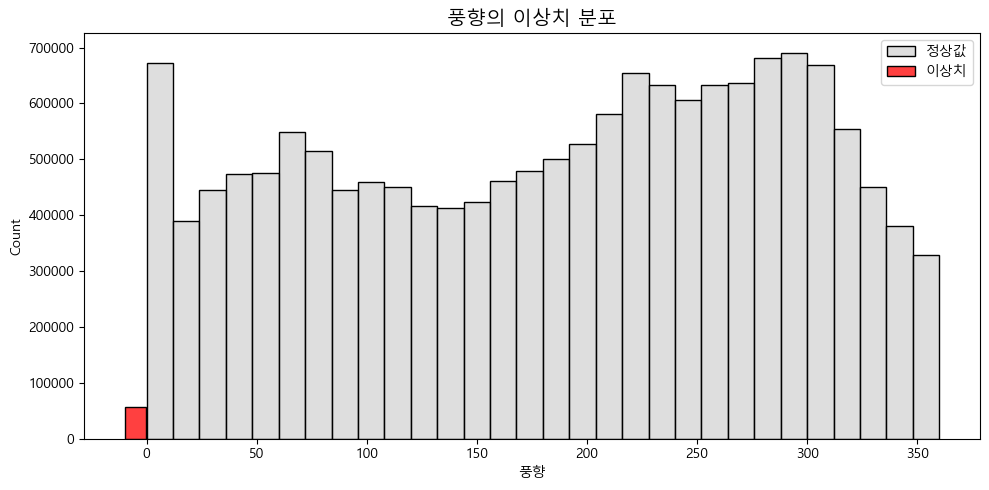

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÌíçÌñ• Î∂ÑÎ¶¨
df_valid = eda_df[eda_df['ÌíçÌñ•'] >= 0]
df_outlier = eda_df[eda_df['ÌíçÌñ•'] < 0]

# ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(10, 5))
sns.histplot(df_valid['ÌíçÌñ•'], bins=30, color='lightgrey', label='Ï†ïÏÉÅÍ∞í')
sns.histplot(df_outlier['ÌíçÌñ•'], bins=1, color='red', label='Ïù¥ÏÉÅÏπò')

plt.title('ÌíçÌñ•Ïùò Ïù¥ÏÉÅÏπò Î∂ÑÌè¨', fontsize=14)
plt.xlabel('ÌíçÌñ•')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
cond = eda_df['ÌíçÌñ•'] < 0
print('ÌíçÌñ•Ïùò Ïù¥ÏÉÅÏπò ÎπÑÏú® : ', eda_df[cond].shape[0]/eda_df.shape[0]*100, '%')

ÌíçÌñ•Ïùò Ïù¥ÏÉÅÏπò ÎπÑÏú® :  0.3614629468857343 %


### ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàòÍ∞Ä 0 -> Ïù¥ÏÉÅÏπò ?

In [18]:
print('ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàòÏùò Ïù¥ÏÉÅÏπò ÎπÑÏú® : ', eda_df[cond2].shape[0]/eda_df.shape[0]*100, '%')

ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàòÏùò Ïù¥ÏÉÅÏπò ÎπÑÏú® :  0.10329885566332621 %


In [21]:
tab = eda_df[eda_df['ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò']<=0]
tab

ÎÇ†Ïßú         Ïó∞ÏõîÏùº     ÎÖÑ   Ïõî  ÏãúÍ∞Ñ  ÏãúÍ∞Ñ_sin  ÏãúÍ∞Ñ_cos  Ìò∏ÏÑ†  \
5355768   2022-01-01 00:00:00  2022-01-01  2022   1   0   0.000   1.000   7   
5355774   2022-01-01 00:00:00  2022-01-01  2022   1   0   0.000   1.000   7   
5355778   2022-01-01 00:00:00  2022-01-01  2022   1   0   0.000   1.000   7   
5355783   2022-01-01 00:00:00  2022-01-01  2022   1   0   0.000   1.000   7   
5355796   2022-01-01 00:00:00  2022-01-01  2022   1   0   0.000   1.000   7   
...                       ...         ...   ...  ..  ..     ...     ...  ..   
15637685  2023-12-30 21:00:00  2023-12-30  2023  12  21  -0.707   0.707   7   
15638226  2023-12-30 22:00:00  2023-12-30  2023  12  22  -0.500   0.866   7   
15638331  2023-12-30 22:00:00  2023-12-30  2023  12  22  -0.500   0.866   7   
15638843  2023-12-30 23:00:00  2023-12-30  2023  12  23  -0.259   0.966   7   
15638927  2023-12-30 23:00:00  2023-12-30  2023  12  23  -0.259   0.966   7   

           Ïó≠Î≤àÌò∏    Ïó≠Î™Ö  ...   ÏÉÅÎåÄÏäµÎèÑ   ÏùºÏÇ¨Îüâ   Ï≤¥Í∞êÏò®ÎèÑ    ÌòºÏû°ÎèÑ  ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò  ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò   ÎØ∏ÏÑ∏Î®ºÏßÄ  \
5355768   3761  Î∂ÄÌèâÍµ¨Ï≤≠  ... 36.000 0.004 -7.500  1.000   1.000   0.000 28.000   
5355774   3756   Ïã†Ï§ëÎèô  ... 36.000 0.004 -7.500  0.000   3.000   0.000 28.000   
5355778   3756   Ïã†Ï§ëÎèô  ... 36.000 0.004 -7.500  0.000   3.000   0.000 28.000   
5355783   3761  Î∂ÄÌèâÍµ¨Ï≤≠  ... 36.000 0.004 -7.500  0.000   1.000   0.000 28.000   
5355796   3760   Íµ¥Ìè¨Ï≤ú  ... 36.000 0.004 -7.500  2.000   2.000   0.000 28.000   
...        ...   ...  ...    ...   ...    ...    ...     ...     ...    ...   
15637685  3756   Ïã†Ï§ëÎèô  ... 94.600 0.003  0.300 25.000   1.000   0.000 39.000   
15638226  3756   Ïã†Ï§ëÎèô  ... 96.200 0.004  1.900 38.000   1.000   0.000 39.000   
15638331  3756   Ïã†Ï§ëÎèô  ... 96.200 0.004  1.900 21.000   1.000   0.000 39.000   
15638843  3756   Ïã†Ï§ëÎèô  ... 96.100 0.005  2.100 40.000   1.000   0.000 39.000   
15638927  3756   Ïã†Ï§ëÎèô  ... 96.100 0.005  2.100 11.000   1.000   0.000 39.000   

          ÎØ∏ÏÑ∏Î®ºÏßÄ_level  ÏöîÏùº  Ìú¥ÏùºÏó¨Î∂Ä  
5355768           Ï¢ãÏùå   5     1  
5355774           Ï¢ãÏùå   5     1  
5355778           Ï¢ãÏùå   5     1  
5355783           Ï¢ãÏùå   5     1  
5355796           Ï¢ãÏùå   5     1  
...              ...  ..   ...  
15637685          Î≥¥ÌÜµ   5     1  
15638226          Î≥¥ÌÜµ   5     1  
15638331          Î≥¥ÌÜµ   5     1  
15638843          Î≥¥ÌÜµ   5     1  
15638927          Î≥¥ÌÜµ   5     1  

[16170 rows x 27 columns]

In [22]:
np.unique(tab['Ïó≠Î™Ö'], return_counts=True)

(array(['Íµ¥Ìè¨Ï≤ú', 'ÍπåÏπòÏö∏', 'Î∂ÄÏ≤úÏãúÏ≤≠', 'Î∂ÄÏ≤úÏ¢ÖÌï©Ïö¥ÎèôÏû•', 'Î∂ÄÌèâÍµ¨Ï≤≠', 'ÏÇºÏÇ∞Ï≤¥Ïú°Í¥Ä', 'ÏÉÅÎèô', 'Ïã†Ï§ëÎèô',
        'Ï∂òÏùò'], dtype=object),
 array([1848, 2898, 2226,  504, 1386,  966, 2604, 2310, 1428], dtype=int64))

In [35]:
Ïó≠ = ['Íµ¥Ìè¨Ï≤ú', 'ÍπåÏπòÏö∏', 'Î∂ÄÏ≤úÏãúÏ≤≠', 'Î∂ÄÏ≤úÏ¢ÖÌï©Ïö¥ÎèôÏû•', 'Î∂ÄÌèâÍµ¨Ï≤≠', 'ÏÇºÏÇ∞Ï≤¥Ïú°Í¥Ä', 'ÏÉÅÎèô', 'Ïã†Ï§ëÎèô',
        'Ï∂òÏùò']
np.unique(tab.loc[eda_df['Ïó≠Î™Ö'].isin(Ïó≠),'Ìò∏ÏÑ†'])

array([7], dtype=int64)

In [26]:
cont_col

['ÎÖÑ',
 'Ïõî',
 'ÏãúÍ∞Ñ',
 'Ìò∏ÏÑ†',
 'Ïó≠Î≤àÌò∏',
 'Ïó≠Î™Ö',
 'ÏÉÅÌïòÍµ¨Î∂Ñ',
 'AWSÏßÄÏ†êÏΩîÎìú',
 'ÏöîÏùº',
 'Ìú¥ÏùºÏó¨Î∂Ä',
 'ÎØ∏ÏÑ∏Î®ºÏßÄ_level']

In [36]:
Ïó≠ = ['Íµ¥Ìè¨Ï≤ú', 'ÍπåÏπòÏö∏', 'Î∂ÄÏ≤úÏãúÏ≤≠', 'Î∂ÄÏ≤úÏ¢ÖÌï©Ïö¥ÎèôÏû•', 'Î∂ÄÌèâÍµ¨Ï≤≠', 'ÏÇºÏÇ∞Ï≤¥Ïú°Í¥Ä', 'ÏÉÅÎèô', 'Ïã†Ï§ëÎèô',
        'Ï∂òÏùò']
np.unique(tab.loc[tab['Ïó≠Î™Ö'].isin(Ïó≠),'ÏãúÍ∞Ñ'], return_counts=True)

(array([ 0,  1,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23], dtype=int64),
 array([770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770,
        770, 770, 770, 770, 770, 770, 770, 770], dtype=int64))

In [38]:
np.unique(tab.loc[tab['Ìò∏ÏÑ†']==7,'ÏãúÍ∞Ñ'], return_counts=True)

(array([ 0,  1,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23], dtype=int64),
 array([770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770,
        770, 770, 770, 770, 770, 770, 770, 770], dtype=int64))

In [40]:
Ïó≠ = ['Íµ¥Ìè¨Ï≤ú', 'ÍπåÏπòÏö∏', 'Î∂ÄÏ≤úÏãúÏ≤≠', 'Î∂ÄÏ≤úÏ¢ÖÌï©Ïö¥ÎèôÏû•', 'Î∂ÄÌèâÍµ¨Ï≤≠', 'ÏÇºÏÇ∞Ï≤¥Ïú°Í¥Ä', 'ÏÉÅÎèô', 'Ïã†Ï§ëÎèô',
        'Ï∂òÏùò']
np.unique(tab.loc[tab['Ïó≠Î™Ö'].isin(Ïó≠),'Ïõî'], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
 array([3906, 4746, 2478, 1302,  924,  504,  462,  756,  420,  294,  252,
         126], dtype=int64))

# Î∂ÑÌè¨ ÌôïÏù∏

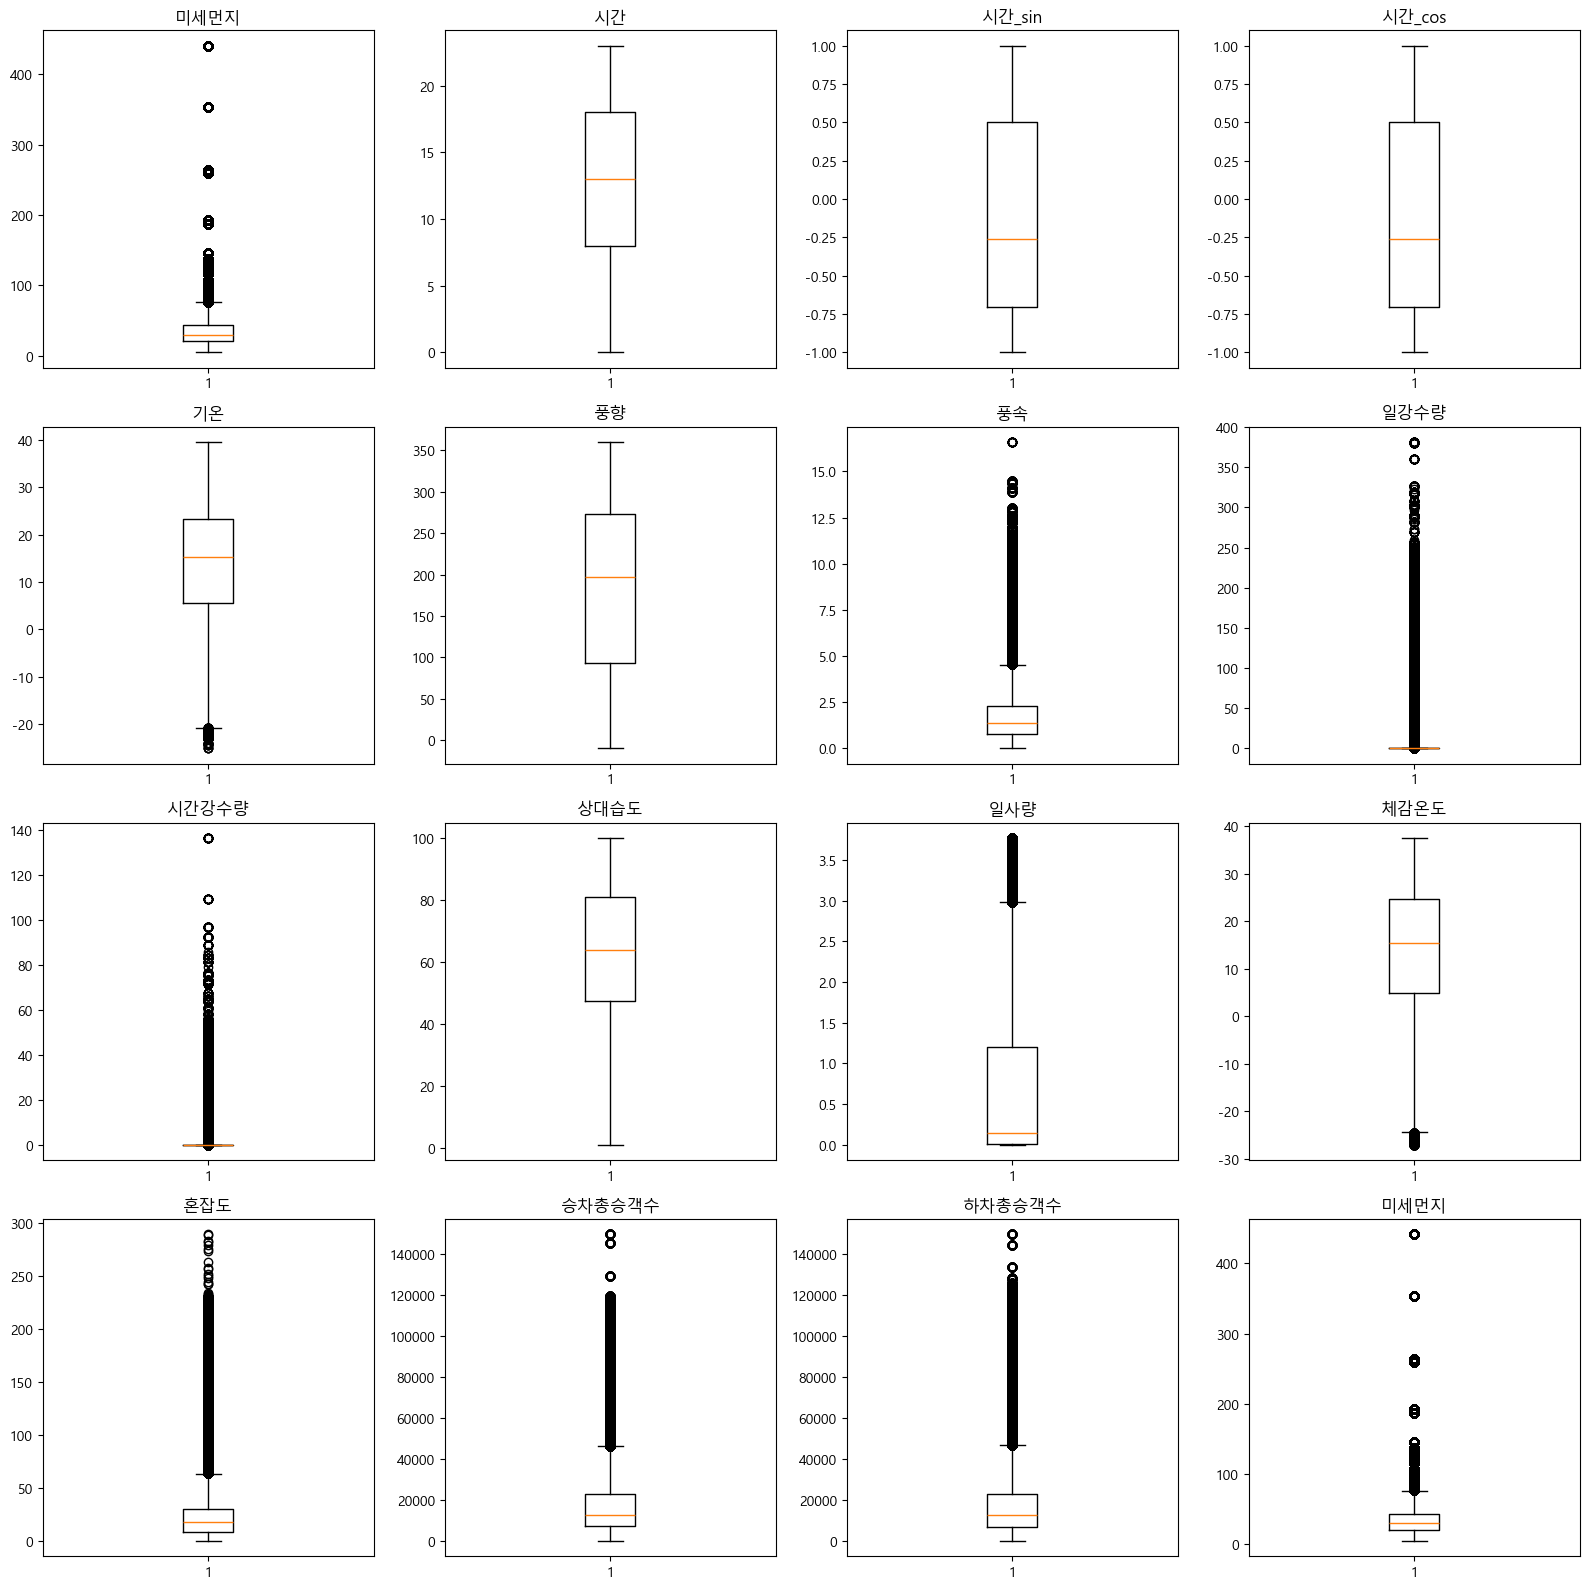

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 4, figsize=(16, 16))  # 4x4 subplot ÏÉùÏÑ±
for i, col in enumerate(cont_col):
    row, col_idx = divmod(i, 4)  # 2Ï∞®Ïõê Ïù∏Îç±Ïã±
    ax[row, col_idx].boxplot(eda_df[col].dropna())
    ax[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()

# EDA : Í∏∞ÏÉÅ <-> ÏßÄÌïòÏ≤† ÌòºÏû°ÎèÑ 
- ÎØ∏ÏÑ∏Î®ºÏßÄ, Í∏∞Ïò®, ÌíçÌñ•, ÌíçÏÜç, ÏùºÍ∞ïÏàòÎüâ, ÏãúÍ∞ÑÍ∞ïÏàòÎüâ, ÏÉÅÎåÄÏäµÎèÑ, ÏùºÏÇ¨Îüâ, Ï≤¥Í∞êÏò®ÎèÑ

In [3]:
Í∏∞ÏÉÅ_cols = 'ÎØ∏ÏÑ∏Î®ºÏßÄ Í∏∞Ïò® ÌíçÌñ• ÌíçÏÜç ÏùºÍ∞ïÏàòÎüâ ÏãúÍ∞ÑÍ∞ïÏàòÎüâ ÏÉÅÎåÄÏäµÎèÑ ÏùºÏÇ¨Îüâ ÌòºÏû°ÎèÑ'.split()
# Ï≤¥Í∞êÏò®ÎèÑ&Í∏∞Ïò®ÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ 0.99Î°ú Í∏∞Ïò®ÏùÑ ÏÇ¨Ïö©Ìï®

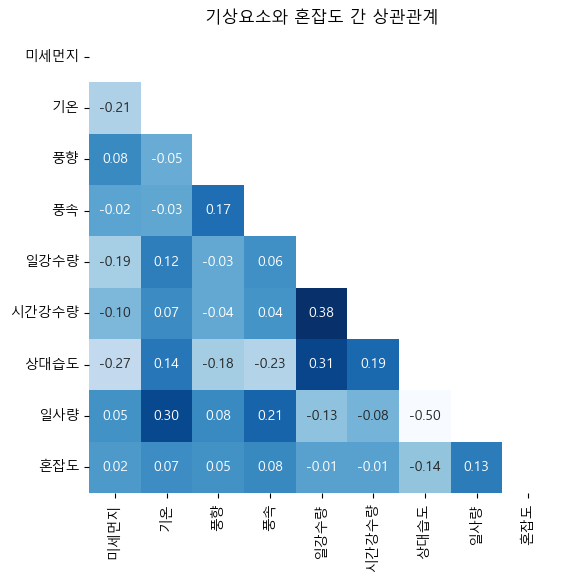

In [80]:
corr_tab = eda_df[Í∏∞ÏÉÅ_cols].corr()
mask = np.triu(np.ones_like(corr_tab, dtype=bool))

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(6, 6))
sns.heatmap(corr_tab, mask=mask, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title("Í∏∞ÏÉÅÏöîÏÜåÏôÄ ÌòºÏû°ÎèÑ Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.show()

- ÏäµÎèÑ(-) > ÏùºÏÇ¨Îüâ(+) > Í∏∞Ïò®(+) > ÌíçÏÜç(+) > ÌíçÌñ•(+) > ÎØ∏ÏÑ∏Î®ºÏßÄ(+) > ÏùºÍ∞ïÏàòÎüâ(-), ÏãúÍ∞ÑÍ∞ïÏàòÎüâ(-)

In [ ]:
# import seaborn as sns
# for col in Í∏∞ÏÉÅ_cols:
#     plt.figure(figsize=(6, 4))
#     sns.kdeplot(data=eda_df, x=col, y='ÌòºÏû°ÎèÑ', fill=True, cmap='Blues')
#     plt.title(f"{col} vs ÌòºÏû°ÎèÑ (Î∞ÄÎèÑ Í∏∞Î∞ò)")
#     plt.tight_layout()
#     plt.show()

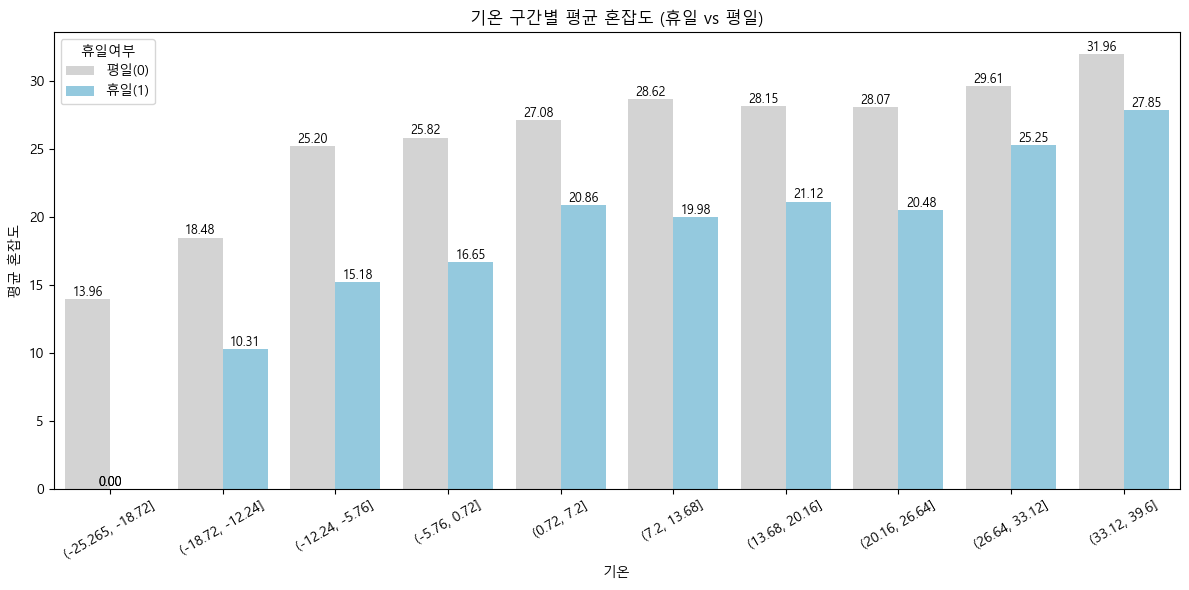

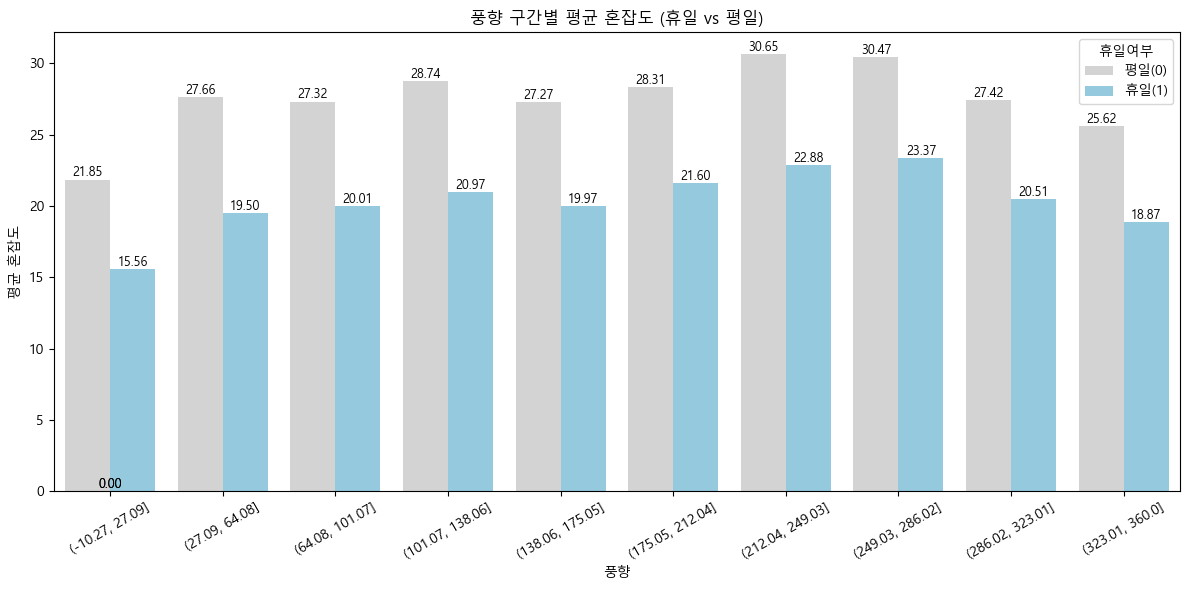

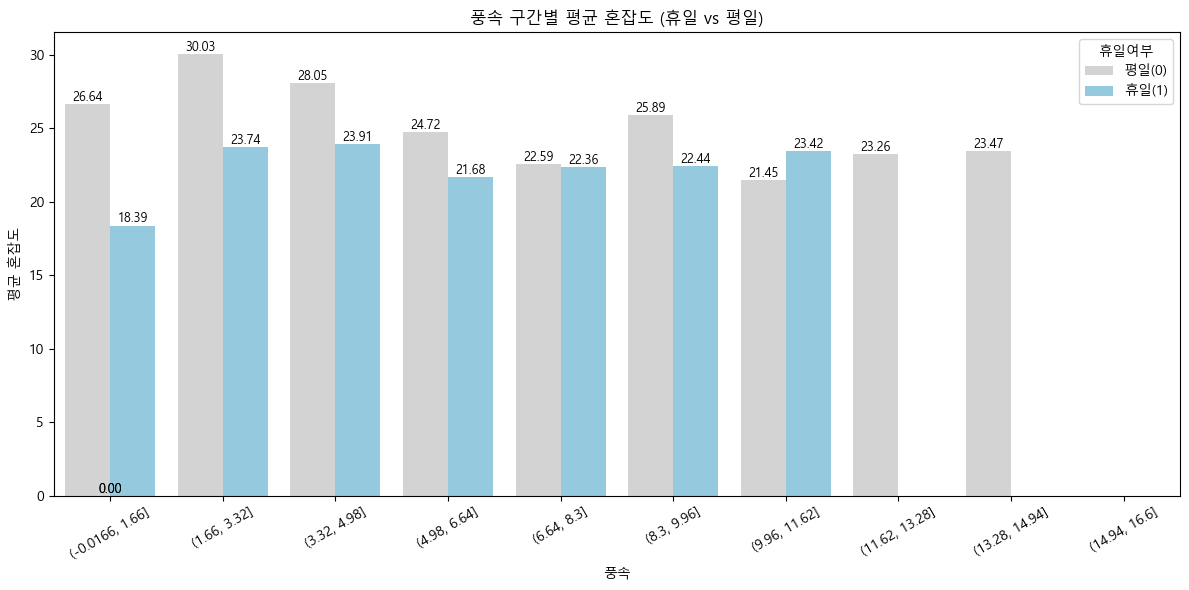

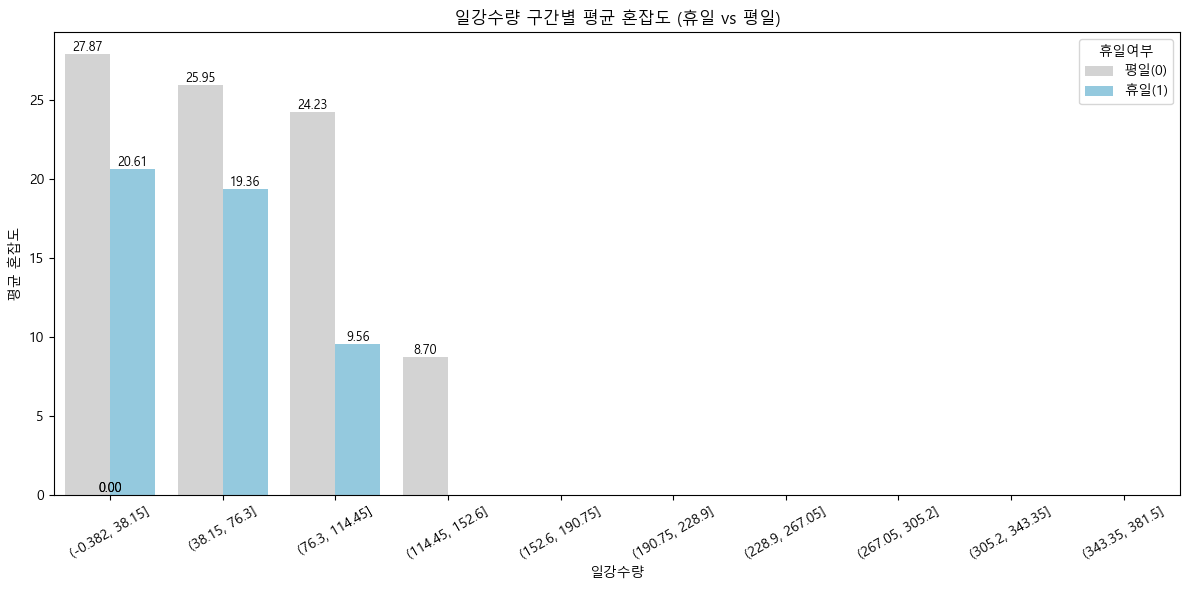

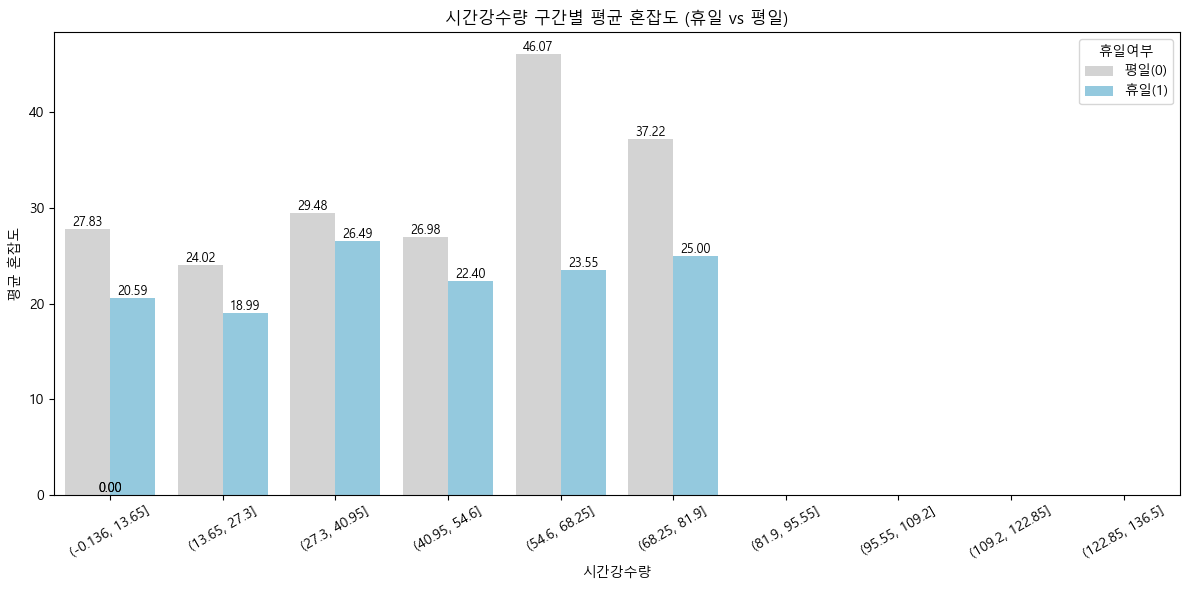

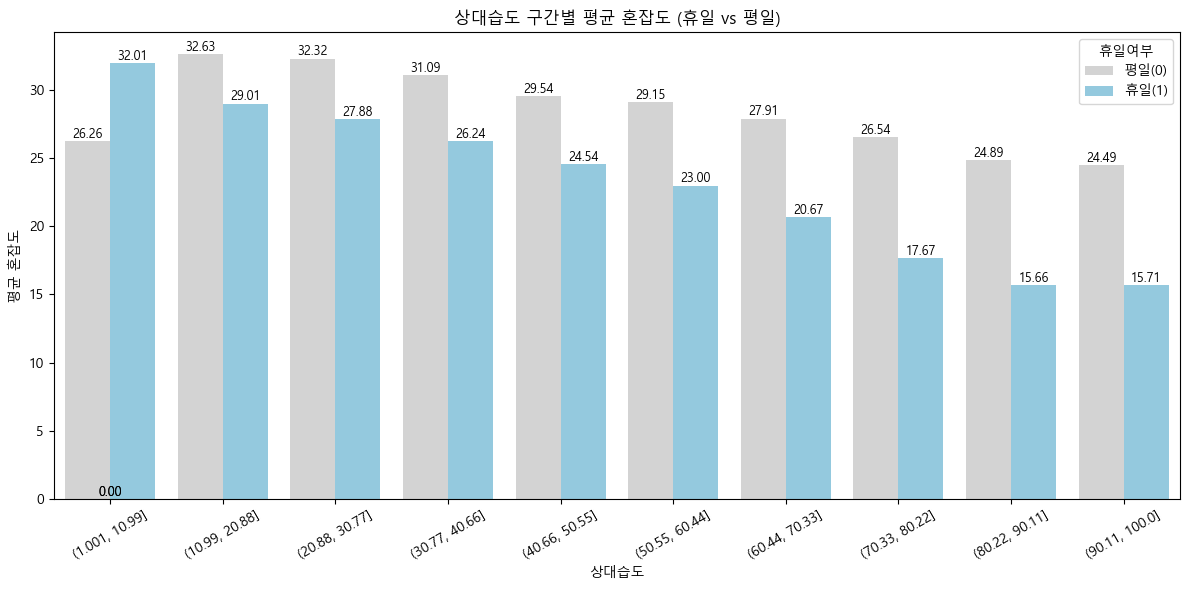

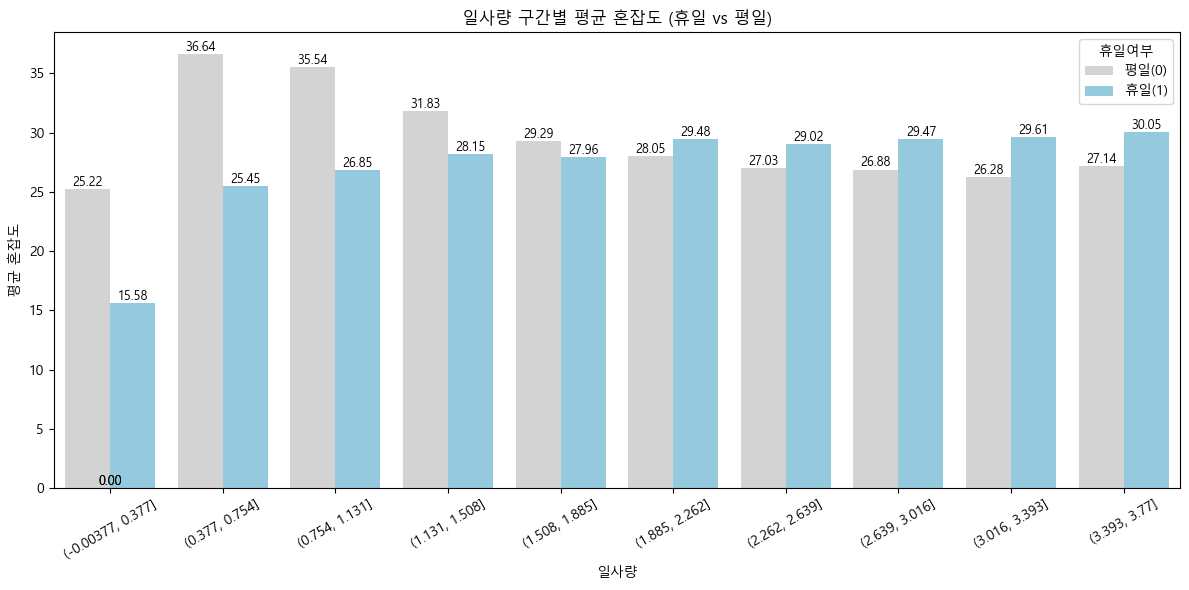

In [47]:
# Í∞ÄÏÑ§ : Ìú¥ÏùºÏù¥ Í∑∏Î†áÏßÄ ÏïäÏùÄ ÎÇ†Î≥¥Îã§ Í∏∞ÏÉÅÏóê Îî∞Î•∏ ÏòÅÌñ•(ÌòºÏû°ÎèÑ) Ï†ÅÏùÑ Í≤ÉÏù¥Îã§. 
eda_df = df.loc[df['ÎÖÑ']==2023,Í∏∞ÏÉÅ_cols+['Ìú¥ÏùºÏó¨Î∂Ä']]

for cut_col in ['Í∏∞Ïò®', 'ÌíçÌñ•', 'ÌíçÏÜç', 'ÏùºÍ∞ïÏàòÎüâ', 'ÏãúÍ∞ÑÍ∞ïÏàòÎüâ', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÏùºÏÇ¨Îüâ']:
    name = f'{cut_col}_Íµ¨Í∞Ñ'
    eda_df[name] = pd.cut(df[cut_col], bins=10)
    stats = (
        eda_df
        .groupby([name, 'Ìú¥ÏùºÏó¨Î∂Ä'])['ÌòºÏû°ÎèÑ']
        .mean()
        .reset_index()
    )
    
    # Í∑∏Î¶¨Í∏∞
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=stats,
        x=name,
        y='ÌòºÏû°ÎèÑ',
        hue='Ìú¥ÏùºÏó¨Î∂Ä',
        ci=None,
        palette={0: 'lightgrey', 1: 'skyblue'},
        order=sorted(stats[name].unique()),         # xÏ∂ï Íµ¨Í∞Ñ ÏàúÏÑú Î≥¥Ïû•
        hue_order=[0, 1]                             # 0=ÌèâÏùº, 1=Ìú¥Ïùº ÏàúÏÑúÎ°ú
    )
    
    # ÎßâÎåÄ ÏúÑÏóê ÌèâÍ∑†Í∞í ÌëúÏãú
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.text(
                p.get_x() + p.get_width() / 2,  # x ÏúÑÏπò: ÎßâÎåÄ Ï§ëÏïô
                height + 0.01,                  # y ÏúÑÏπò: ÎßâÎåÄ ÏúÑ ÏïΩÍ∞Ñ ÎùÑÏö∞Í∏∞
                f"{height:.2f}",                # ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ
                ha='center', va='bottom',
                fontsize=9
            )
    
    # Ï†úÎ™©¬∑Î†àÏù¥Î∏î
    plt.title(f"{cut_col} Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ (Ìú¥Ïùº vs ÌèâÏùº)")
    plt.xlabel(cut_col)
    plt.ylabel("ÌèâÍ∑† ÌòºÏû°ÎèÑ")
    plt.xticks(rotation=30)
    plt.legend(title='Ìú¥ÏùºÏó¨Î∂Ä', labels=['ÌèâÏùº(0)', 'Ìú¥Ïùº(1)'])
    plt.tight_layout()
    plt.show()

# EDA : Í≥ÑÏ†à <-> ÏßÄÌïòÏ≤† ÌòºÏû°ÎèÑ 
- Ïõî
- Ïõî + ÎπÑÏò§ÎäîÎÇ†
- Ïõî + ÏäµÎèÑ
- Ïõî + Ï≤¥Í∞êÏò®ÎèÑ
- Ïõî + ÏãúÍ∞Ñ
- Ïõî + ÏùºÏÇ¨Îüâ

## ÏäµÎèÑ

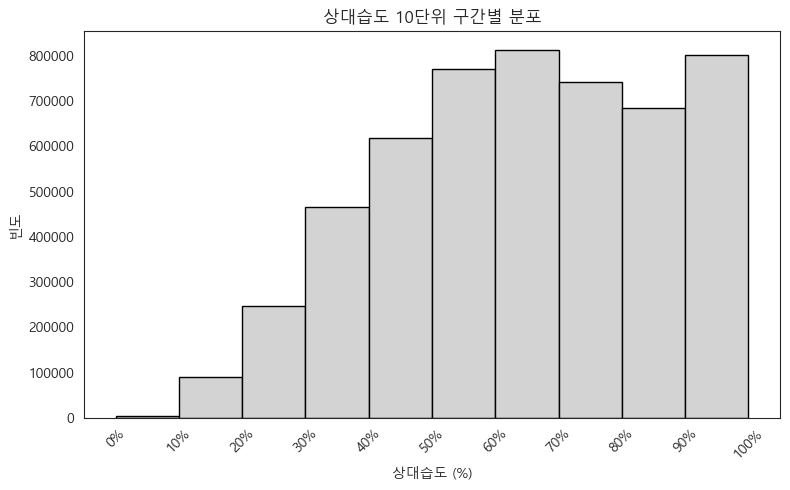

In [116]:
# 1) 0~100ÍπåÏßÄ 10Îã®ÏúÑÎ°ú bin Í≤ΩÍ≥Ñ Ï†ïÏùò
bins = np.arange(0, 101, 10)      # [  0,  10,  20, ‚Ä¶, 100]
labels = [f"{i}‚Äì{i+10}%" for i in bins[:-1]]  # ['0‚Äì10%', '10‚Äì20%', ‚Ä¶, '90‚Äì100%']

# 2) ÏÉÅÎåÄÏäµÎèÑ_Íµ¨Í∞Ñ Ïª¨Îüº ÏÉùÏÑ±
df['ÏÉÅÎåÄÏäµÎèÑ_Íµ¨Í∞Ñ'] = pd.cut(
    df['ÏÉÅÎåÄÏäµÎèÑ'],
    bins=bins,
    labels=labels,
    right=False,        # Ïò§Î•∏Ï™Ω Í≤ΩÍ≥Ñ Ï†úÏô∏, ÏôºÏ™Ω Í≤ΩÍ≥Ñ Ìè¨Ìï®
    include_lowest=True # ÏµúÏÜüÍ∞í Ìè¨Ìï®
)

# 3) ÌûàÏä§ÌÜ†Í∑∏Îû®: Íµ¨Í∞ÑÎ≥Ñ ÎπàÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
plt.hist(
    df['ÏÉÅÎåÄÏäµÎèÑ'],
    bins=bins,
    edgecolor='black',
    color='lightgray'
)
plt.xticks(bins, [f"{b}%" for b in bins], rotation=45)
plt.xlabel('ÏÉÅÎåÄÏäµÎèÑ (%)')
plt.ylabel('ÎπàÎèÑ')
plt.title('ÏÉÅÎåÄÏäµÎèÑ 10Îã®ÏúÑ Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÌè¨')
plt.tight_layout()
plt.show()


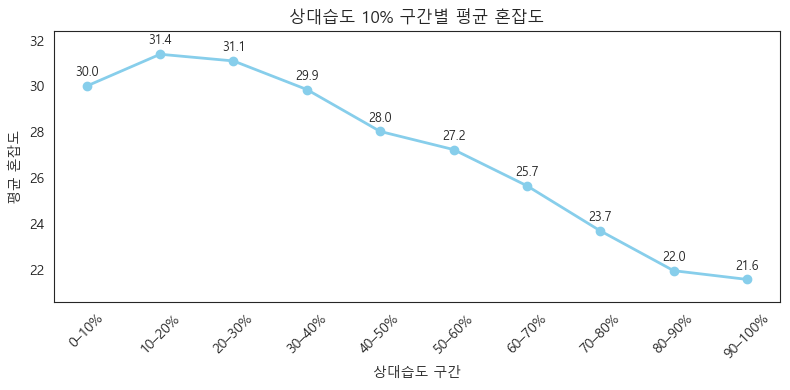

In [118]:
humidity_bins = [f"{i}‚Äì{i+10}%" for i in range(0, 100, 10)]

# 2) Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ Í≥ÑÏÇ∞ (labels ÏàúÏÑúÎåÄÎ°ú reindex)
humidity_mean = (
    df.groupby('ÏÉÅÎåÄÏäµÎèÑ_Íµ¨Í∞Ñ')['ÌòºÏû°ÎèÑ']
      .mean()
      .reindex(humidity_bins)
)

# 4) ÌîåÎ°Ø
fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(len(humidity_bins))

ax.plot(
    x,
    humidity_mean.values,
    marker='o',
    markersize=6,
    linewidth=2,
    color='skyblue'
)

# 5) Í∞í ÌëúÏãú
for xi, yi in zip(x, humidity_mean.values):
    ax.text(xi, yi + 0.3, f"{yi:.1f}",
            ha='center', va='bottom', fontsize=9)

# 6) xÏ∂ï ÏÑ§Ï†ï
ax.set_xticks(x)
ax.set_xticklabels(humidity_bins, rotation=45)
ax.set_xlabel('ÏÉÅÎåÄÏäµÎèÑ Íµ¨Í∞Ñ')
ax.set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.set_ylim(humidity_mean.min() - 1, humidity_mean.max() + 1)
ax.set_title('ÏÉÅÎåÄÏäµÎèÑ 10% Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ')

# 7) Î∂àÌïÑÏöîÌïú Í≤©Ïûê/Ïä§ÌååÏù∏ Ï†úÍ±∞
ax.grid(False)

plt.tight_layout()
plt.show()

## Í∏∞Ïò®

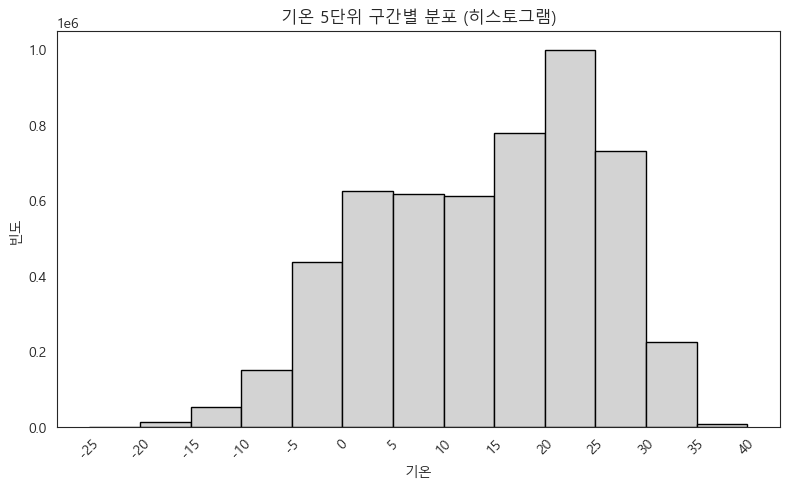

In [126]:
# 1) Í∏∞Ïò® ÏµúÏÜå¬∑ÏµúÎåÄÍ∞í Í∏∞Ï§ÄÏúºÎ°ú 5Îã®ÏúÑ bin Í≤ΩÍ≥Ñ Ï†ïÏùò
min_temp = np.floor(df['Í∏∞Ïò®'].min() / 5) * 5
max_temp = np.ceil(df['Í∏∞Ïò®'].max() / 5) * 5
bins = np.arange(min_temp, max_temp + 5, 5)  
# Ïòà: [‚Äì? , 0, 5, 10, 15, ‚Ä¶]

# 2) Î†àÏù¥Î∏î ÏÉùÏÑ± (‚ÄúÏãúÏûë‚ÄìÎÅù‚Äù ÌòïÌÉú)
labels = [f"{int(b)}‚Äì{int(b+5)}" for b in bins[:-1]]

# 3) Í∏∞Ïò®_Íµ¨Í∞Ñ Ïª¨Îüº ÏÉùÏÑ±
df['Í∏∞Ïò®_Íµ¨Í∞Ñ_5ÎèÑ'] = pd.cut(
    df['Í∏∞Ïò®'],
    bins=bins,
    labels=labels,
    right=False,        # [ÏãúÏûë, ÎÅù)
    include_lowest=True # ÏµúÏÜüÍ∞í Ìè¨Ìï®
)

# 4) ÌûàÏä§ÌÜ†Í∑∏Îû®: 5Îã®ÏúÑ Íµ¨Í∞Ñ ÎπàÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
plt.hist(
    df['Í∏∞Ïò®'],
    bins=bins,
    edgecolor='black',
    color='lightgray'
)
plt.xticks(bins, [f"{int(b)}" for b in bins], rotation=45)
plt.xlabel('Í∏∞Ïò®')
plt.ylabel('ÎπàÎèÑ')
plt.title('Í∏∞Ïò® 5Îã®ÏúÑ Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)')
plt.tight_layout()
plt.show()

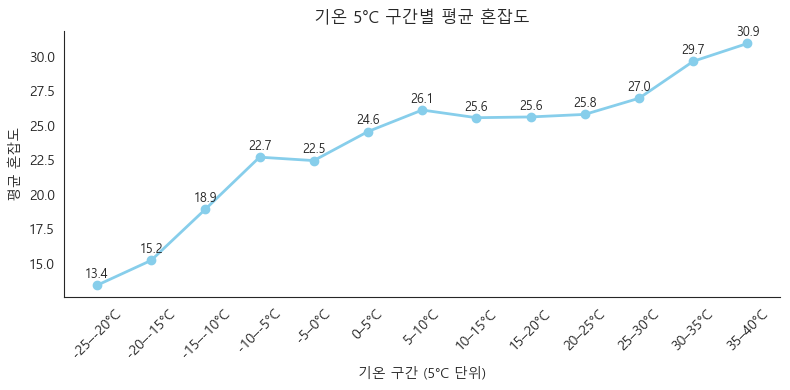

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) Í∏∞Ïò® ÏµúÏÜå¬∑ÏµúÎåÄÍ∞í Í∏∞Ï§ÄÏúºÎ°ú 5ÎèÑ Îã®ÏúÑ bin Í≤ΩÍ≥Ñ Ï†ïÏùò
min_temp = np.floor(df['Í∏∞Ïò®'].min() / 5) * 5
max_temp = np.ceil(df['Í∏∞Ïò®'].max() / 5) * 5
bins = np.arange(min_temp, max_temp + 5, 5)  # Ïòà: [-10, -5, 0, 5, 10, ‚Ä¶]

# 2) Î†àÏù¥Î∏î ÏÉùÏÑ± (‚ÄúÏãúÏûë‚ÄìÎÅù¬∞C‚Äù ÌòïÌÉú)
labels = [f"{int(b)}‚Äì{int(b+5)}¬∞C" for b in bins[:-1]]

# 3) Í∏∞Ïò®_Íµ¨Í∞Ñ_5ÎèÑ Ïª¨Îüº ÏÉùÏÑ±
df['Í∏∞Ïò®_Íµ¨Í∞Ñ_5ÎèÑ'] = pd.cut(
    df['Í∏∞Ïò®'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# 4) Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ Í≥ÑÏÇ∞ Î∞è ÏàúÏÑú Î≥¥Ïû•
temp_mean = (
    df.groupby('Í∏∞Ïò®_Íµ¨Í∞Ñ_5ÎèÑ')['ÌòºÏû°ÎèÑ']
      .mean()
      .reindex(labels)
)

# 5) x Ï¢åÌëú ÏÉùÏÑ±
x = np.arange(len(labels))

# 6) ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(
    x,
    temp_mean.values,
    marker='o',
    markersize=6,
    linewidth=2,
    color='skyblue'
)

# 7) Ï†ê ÏúÑÏóê Í∞í ÌëúÏãú
for xi, yi in zip(x, temp_mean.values):
    ax.text(
        xi, yi + 0.3, f"{yi:.1f}",
        ha='center', va='bottom', fontsize=9
    )

# 8) xÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('Í∏∞Ïò® Íµ¨Í∞Ñ (5¬∞C Îã®ÏúÑ)')
ax.set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.set_title('Í∏∞Ïò® 5¬∞C Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ')

# 9) Í≤©ÏûêÏÑ†¬∑Ïä§ÌååÏù∏ Ï†úÍ±∞
ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

## Ïõî

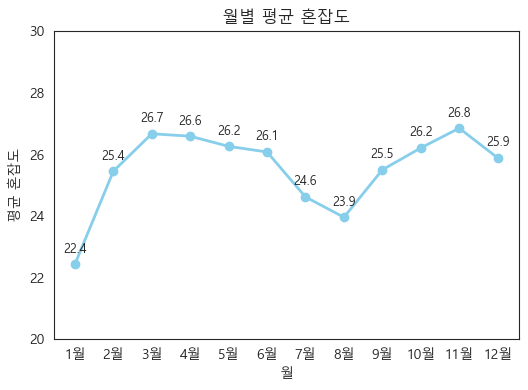

In [108]:
plt.rcParams['font.family'] = 'Malgun Gothic'
# 2) ÏõîÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ Í≥ÑÏÇ∞
monthly_mean = df.groupby('Ïõî')['ÌòºÏû°ÎèÑ'].mean().reindex(range(1,13))

# 3) ÌîåÎ°Ø
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(
    monthly_mean.index,
    monthly_mean.values,
    marker='o',
    markersize=6,
    linewidth=2,
    color='skyblue'
)

# 4) Ï†ê ÏúÑÏóê Í∞í ÌëúÏãú
for x, y in zip(monthly_mean.index, monthly_mean.values):
    ax.text(x, y + 0.3, f"{y:.1f}",
            ha='center', va='bottom', fontsize=9)

# 5) xÏ∂ï Î†àÏù¥Î∏î
ax.set_ylim(20, 30)
ax.set_xticks(range(1,13))
ax.set_xticklabels([f"{m}Ïõî" for m in range(1,13)])
ax.set_xlabel('Ïõî')
ax.set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.set_title('ÏõîÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ')
plt.show()

## ÏùºÍ∞ïÏàòÎüâ

In [45]:
df = eda_df.copy()

df['ÏùºÍ∞ïÏàòÎüâ_Íµ¨Í∞Ñ'] = np.where(df['ÏùºÍ∞ïÏàòÎüâ'] >= 20, 'Í∞ïÌïúÎπÑ',
                       np.where(df['ÏùºÍ∞ïÏàòÎüâ'] >= 10, 'Î≥¥ÌÜµÎπÑ',
                       np.where(df['ÏùºÍ∞ïÏàòÎüâ'] >= 1, 'ÏïΩÌïúÎπÑ', 'ÎπÑ Ïïà Ïò¥')))
conditions = [
    df['Ïõî'].between(3, 5),   # 3,4,5Ïõî ‚Üí Î¥Ñ
    df['Ïõî'].between(6, 8),   # 6,7,8Ïõî ‚Üí Ïó¨Î¶Ñ
    df['Ïõî'].between(9, 11),  # 9,10,11Ïõî ‚Üí Í∞ÄÏùÑ
]
choices = ['Î¥Ñ', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ']
df['Í≥ÑÏ†à'] = np.select(conditions, choices, default='Í≤®Ïö∏')

df['Ïõî'] = df['Ïõî'].astype('category')

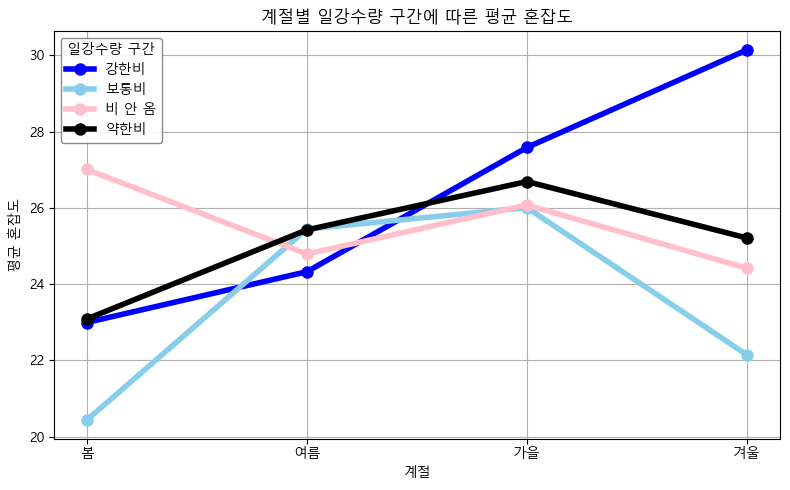

In [37]:
# 3) Í≥ÑÏ†à ÏàúÏÑúÌòï ÏßÄÏ†ï
season_order = ['Î¥Ñ', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ', 'Í≤®Ïö∏']
df['Í≥ÑÏ†à'] = pd.Categorical(df['Í≥ÑÏ†à'],
                           categories=season_order,
                           ordered=True)

# 4) ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
tab = pd.crosstab(
    index=df['Í≥ÑÏ†à'],
    columns=df['ÏùºÍ∞ïÏàòÎüâ_Íµ¨Í∞Ñ'],
    values=df['ÌòºÏû°ÎèÑ'],
    aggfunc='mean'
).reindex(index=season_order)

# 5) Ïª¨Îü¨ Îßµ Ï†ïÏùò (ÌÇ§Îäî Î∞òÎìúÏãú ÏúÑÏóêÏÑú ÎßåÎì† 4Í∞ÄÏßÄ Î¨∏ÏûêÏó¥Í≥º ÏùºÏπò)
colors = {
    'ÎπÑ Ïïà Ïò¥': 'pink',
    'ÏïΩÌïúÎπÑ':   'black',
    'Î≥¥ÌÜµÎπÑ':   'skyblue',
    'Í∞ïÌïúÎπÑ':   'blue',
}

# 6) ÎùºÏù∏ ÌîåÎ°Ø
fig, ax = plt.subplots(figsize=(8, 5))
for category in tab.columns:
    ax.plot(
        tab.index, tab[category],
        marker='o',
        label=category,
        color=colors.get(category, 'gray')  # ÎßµÏóê ÏóÜÏúºÎ©¥ 'gray' ÏÇ¨Ïö©
        ,markersize=8
        ,linewidth=4
    )

ax.set_xlabel('Í≥ÑÏ†à')
ax.set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.set_title('Í≥ÑÏ†àÎ≥Ñ ÏùºÍ∞ïÏàòÎüâ Íµ¨Í∞ÑÏóê Îî∞Î•∏ ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.grid(True)

# 7) Î≤îÎ°Ä Ïä§ÌÉÄÏùºÎßÅ
ax.legend(
    title='ÏùºÍ∞ïÏàòÎüâ Íµ¨Í∞Ñ',
    loc='best',
    frameon=True,
    framealpha=0.9,
    edgecolor='gray'
)

plt.tight_layout()
plt.show()

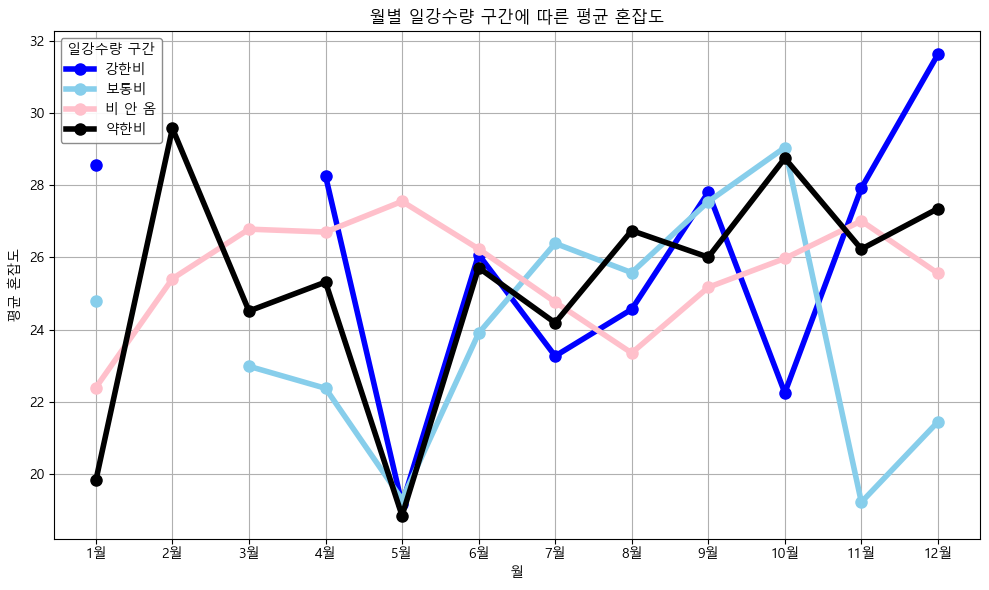

In [48]:
# 2) ÏõîÏùÑ ÏàúÏÑúÌòï Î≤îÏ£ºÌòïÏúºÎ°ú ÏßÄÏ†ï (1~12Ïõî)
month_order = list(range(1, 13))
df['Ïõî'] = pd.Categorical(df['Ïõî'],
                         categories=month_order,
                         ordered=True)

# 3) ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
tab = pd.crosstab(
    index=df['Ïõî'],
    columns=df['ÏùºÍ∞ïÏàòÎüâ_Íµ¨Í∞Ñ'],
    values=df['ÌòºÏû°ÎèÑ'],
    aggfunc='mean'
).reindex(index=month_order)

# 4) Ïª¨Îü¨Îßµ Ï†ïÏùò
colors = {
    'ÎπÑ Ïïà Ïò¥': 'pink',
    'ÏïΩÌïúÎπÑ':   'black',
    'Î≥¥ÌÜµÎπÑ':   'skyblue',
    'Í∞ïÌïúÎπÑ':   'blue',
}

# 5) ÎùºÏù∏ ÌîåÎ°Ø
fig, ax = plt.subplots(figsize=(10, 6))
for category in tab.columns:
    ax.plot(
        [int(m) for m in tab.index],   # Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Ïõî ‚Üí Ï†ïÏàò Î¶¨Ïä§Ìä∏
        tab[category],
        marker='o',
        markersize=8,
        linewidth=4,
        label=category,
        color=colors.get(category, 'gray')
    )

# 6) xÏ∂ï ÎààÍ∏à¬∑Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax.set_xticks(month_order)
ax.set_xticklabels([f'{m}Ïõî' for m in month_order])

ax.set_xlabel('Ïõî')
ax.set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.set_title('ÏõîÎ≥Ñ ÏùºÍ∞ïÏàòÎüâ Íµ¨Í∞ÑÏóê Îî∞Î•∏ ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.grid(True)

# 7) Î≤îÎ°Ä
ax.legend(
    title='ÏùºÍ∞ïÏàòÎüâ Íµ¨Í∞Ñ',
    loc='best',
    frameon=True,
    framealpha=0.9,
    edgecolor='gray'
)

plt.tight_layout()
plt.show()

## ÏùºÏÇ¨Îüâ

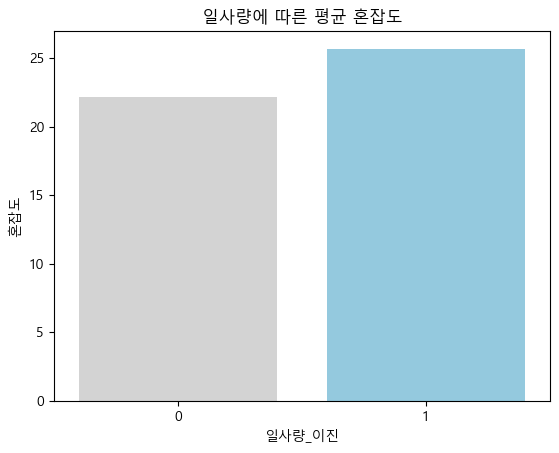

In [54]:
df['ÏùºÏÇ¨Îüâ_Ïù¥ÏßÑ'] = np.where(df['ÏùºÏÇ¨Îüâ']==0, '0', '1')
import seaborn as sns
plt.title('ÏùºÏÇ¨ÎüâÏóê Îî∞Î•∏ ÌèâÍ∑† ÌòºÏû°ÎèÑ')
sns.barplot(df.groupby('ÏùºÏÇ¨Îüâ_Ïù¥ÏßÑ')['ÌòºÏû°ÎèÑ'].mean(), palette=['lightgrey','skyblue'])
plt.show()

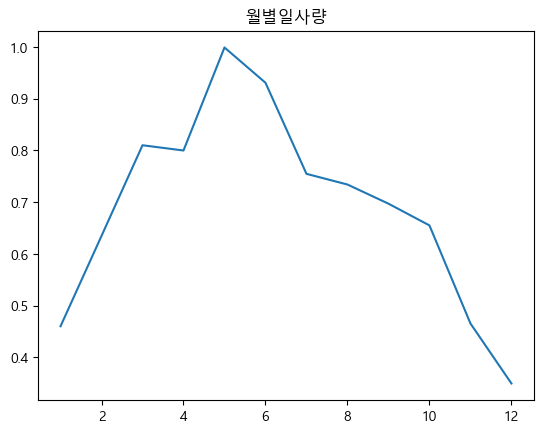

In [59]:
plt.plot(df.groupby('Ïõî')['ÏùºÏÇ¨Îüâ'].mean())
plt.title('ÏõîÎ≥ÑÏùºÏÇ¨Îüâ')
plt.show()

## ÏãúÍ∞Ñ

In [68]:
# (1) ÏïºÍ∞Ñ ÏãúÍ∞Ñ Ï†ïÏùò: 19~23Ïãú + 0~5Ïãú
night_hours = list(range(19, 24)) + list(range(0, 6))

# (2) dfÏóê is_night Ïª¨Îüº Ï∂îÍ∞Ä
df['is_night'] = df['ÏãúÍ∞Ñ'].isin(night_hours)

# (3) ÏùºÏÇ¨Îüâ_Ïù¥ÏßÑ==0Ïù∏ Í≤ΩÏö∞Ïùò is_night ÎπÑÏú® ÌôïÏù∏
zero_radiation = df[df['ÏùºÏÇ¨Îüâ_Ïù¥ÏßÑ'] == '0']
night_ratio = zero_radiation['is_night'].mean()
day_times = zero_radiation.loc[~zero_radiation['is_night'], 'ÏãúÍ∞Ñ'].unique()

print(f"ÏùºÏÇ¨Îüâ=0 Ï§ë ÏïºÍ∞Ñ ÎπÑÏú®: {night_ratio:.2%}")
print(f"ÏïºÍ∞ÑÏù¥ ÏïÑÎãå ÏãúÍ∞ÑÎåÄ(ÏùºÏÇ¨Îüâ=0): {sorted(day_times)}Ïãú")

ÏùºÏÇ¨Îüâ=0 Ï§ë ÏïºÍ∞Ñ ÎπÑÏú®: 56.89%
ÏïºÍ∞ÑÏù¥ ÏïÑÎãå ÏãúÍ∞ÑÎåÄ(ÏùºÏÇ¨Îüâ=0): [6, 7, 8, 9, 10, 17, 18]Ïãú


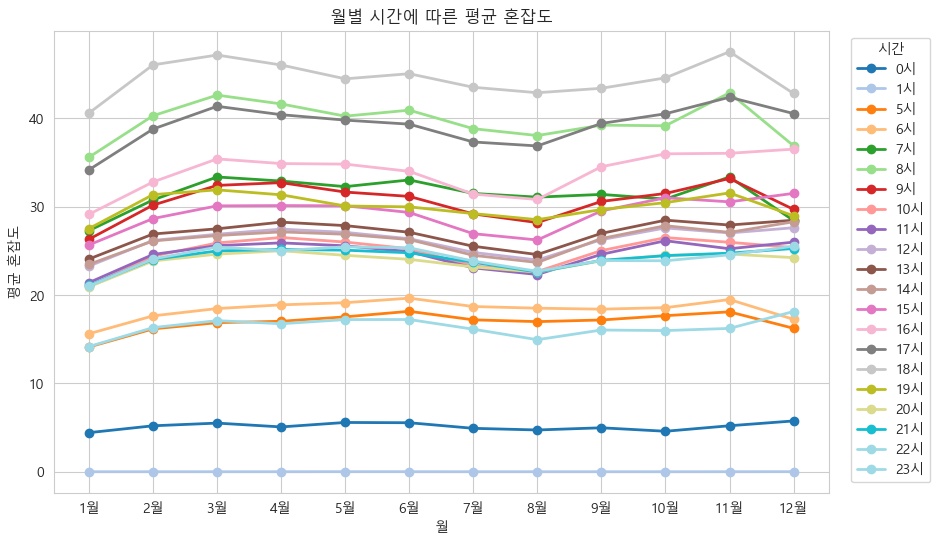

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2) ÏõîÏùÑ ÏàúÏÑúÌòï Î≤îÏ£ºÌòïÏúºÎ°ú ÏßÄÏ†ï (1~12Ïõî)
month_order = list(range(1, 13))
df['Ïõî'] = pd.Categorical(df['Ïõî'],
                         categories=month_order,
                         ordered=True)

# 3) ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
tab = pd.crosstab(
    index=df['Ïõî'],
    columns=df['ÏãúÍ∞Ñ'],
    values=df['ÌòºÏû°ÎèÑ'],
    aggfunc='mean'
).reindex(index=month_order)

# 5) ÎùºÏù∏ ÌîåÎ°Ø
fig, ax = plt.subplots(figsize=(10, 6))

# ‚Äî‚Äî‚Äî‚Äî Ïª¨Îü¨Îßµ Ï§ÄÎπÑ ‚Äî‚Äî‚Äî‚Äî
n_lines = len(tab.columns)
cmap = plt.get_cmap('tab20', n_lines)  # 'tab20'ÏóêÏÑú n_lines ÏÉâÏùÑ ÎΩëÏïÑÎÉÑ

for i, category in enumerate(tab.columns):
    ax.plot(
        [int(m) for m in tab.index],   # Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Ïõî ‚Üí Ï†ïÏàò Î¶¨Ïä§Ìä∏
        tab[category],
        marker='o',
        markersize=6,
        linewidth=2,
        label=f"{category}Ïãú",
        color=cmap(i)                  # iÎ≤àÏß∏ ÏÉâ ÏÇ¨Ïö©
    )

# 6) xÏ∂ï ÎààÍ∏à¬∑Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax.set_xticks(month_order)
ax.set_xticklabels([f'{m}Ïõî' for m in month_order])
ax.legend(title='ÏãúÍ∞Ñ', bbox_to_anchor=(1.02, 1), loc='upper left')

ax.set_xlabel('Ïõî')
ax.set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.set_title('ÏõîÎ≥Ñ ÏãúÍ∞ÑÏóê Îî∞Î•∏ ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.grid(True)

In [81]:
tab

ÏãúÍ∞Ñ    0     1      5      6      7      8      9      10     11     12     13  \
Ïõî                                                                               
1  4.430 0.009 14.119 15.615 27.284 35.588 26.310 20.987 21.405 23.269 24.072   
2  5.204 0.010 16.167 17.640 30.753 40.280 30.169 24.394 24.585 26.171 26.899   
3  5.509 0.010 16.871 18.466 33.351 42.609 32.397 25.883 25.579 26.876 27.488   
4  5.076 0.011 17.026 18.884 32.890 41.613 32.709 26.504 25.897 27.452 28.240   
5  5.581 0.014 17.528 19.127 32.258 40.231 31.644 25.988 25.564 27.086 27.850   
6  5.550 0.012 18.153 19.643 33.015 40.907 31.153 25.231 24.901 26.367 27.095   
7  4.917 0.009 17.190 18.695 31.487 38.812 29.171 23.286 23.067 24.817 25.513   
8  4.731 0.009 16.987 18.507 31.068 38.038 28.192 22.654 22.318 23.956 24.574   
9  4.978 0.010 17.173 18.398 31.378 39.211 30.584 25.020 24.599 26.259 26.972   
10 4.585 0.008 17.659 18.569 30.851 39.144 31.484 26.493 26.136 27.585 28.464   
11 5.208 0.012 18.094 19.488 33.352 42.869 33.178 25.963 25.232 27.018 27.913   
12 5.753 0.013 16.232 17.245 28.420 36.880 29.685 25.360 25.980 27.607 28.458   

ÏãúÍ∞Ñ     14     15     16     17     18     19     20     21     22     23  
Ïõî                                                                         
1  23.466 25.663 29.130 34.168 40.588 27.518 20.925 21.076 21.013 14.170  
2  26.114 28.647 32.788 38.773 46.031 31.352 23.849 24.015 24.070 16.306  
3  26.725 30.083 35.394 41.345 47.144 31.894 24.623 24.986 25.417 17.099  
4  27.139 30.116 34.866 40.395 46.018 31.334 25.003 25.153 25.012 16.749  
5  26.869 30.091 34.804 39.781 44.453 30.069 24.488 25.068 25.449 17.219  
6  26.271 29.336 33.986 39.324 45.032 29.969 24.034 24.776 25.336 17.226  
7  24.488 26.935 31.415 37.309 43.498 29.209 23.177 23.699 23.838 16.129  
8  23.680 26.223 30.804 36.861 42.880 28.521 22.587 22.591 22.679 14.943  
9  26.387 29.510 34.514 39.407 43.384 29.666 23.859 23.919 23.898 16.040  
10 27.839 30.997 35.968 40.498 44.561 30.447 24.489 24.450 23.872 15.974  
11 27.083 30.536 36.028 42.372 47.519 31.548 24.632 24.734 24.545 16.220  
12 28.284 31.497 36.500 40.524 42.796 28.957 24.224 25.258 25.520 18.132

In [82]:
conditions = [
    df['ÏãúÍ∞Ñ'].between(0, 1),    # 0‚Äì1Ïãú ‚Üí Ïã¨Ïïº
    df['ÏãúÍ∞Ñ'].between(7, 9),    # 7‚Äì9Ïãú ‚Üí Ï∂úÍ∑ºÏãúÍ∞Ñ
    df['ÏãúÍ∞Ñ'].between(10, 16),  # 10‚Äì16Ïãú ‚Üí ÎÇÆ ÏãúÍ∞Ñ
    df['ÏãúÍ∞Ñ'].between(17, 19),  # 17‚Äì19Ïãú ‚Üí Ìá¥Í∑ºÏãúÍ∞Ñ
    df['ÏãúÍ∞Ñ'].between(20, 23),  # 20‚Äì23Ïãú ‚Üí Ï†ÄÎÖÅ ÌïúÏÇ∞
]

# Í∞Å Ï°∞Í±¥Ïóê Îß§Ïπ≠Îê† Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù¥Î¶Ñ
choices = ['Ïã¨Ïïº', 'Ï∂úÍ∑ºÏãúÍ∞Ñ', 'ÎÇÆ ÏãúÍ∞Ñ', 'Ìá¥Í∑ºÏãúÍ∞Ñ', 'Ï†ÄÎÖÅ ÌïúÏÇ∞']

# ÏãúÍ∞ÑÎåÄ Ïª¨Îüº ÏÉùÏÑ± (ÏúÑÏóê Ï†ïÏùòÌïòÏßÄ ÏïäÏùÄ 2‚Äì6ÏãúÎäî 'Í∏∞ÌÉÄ'Î°ú Ï≤òÎ¶¨)
df['ÏãúÍ∞Ñ_Íµ¨Í∞Ñ'] = np.select(conditions, choices, default='Í∏∞ÌÉÄ')

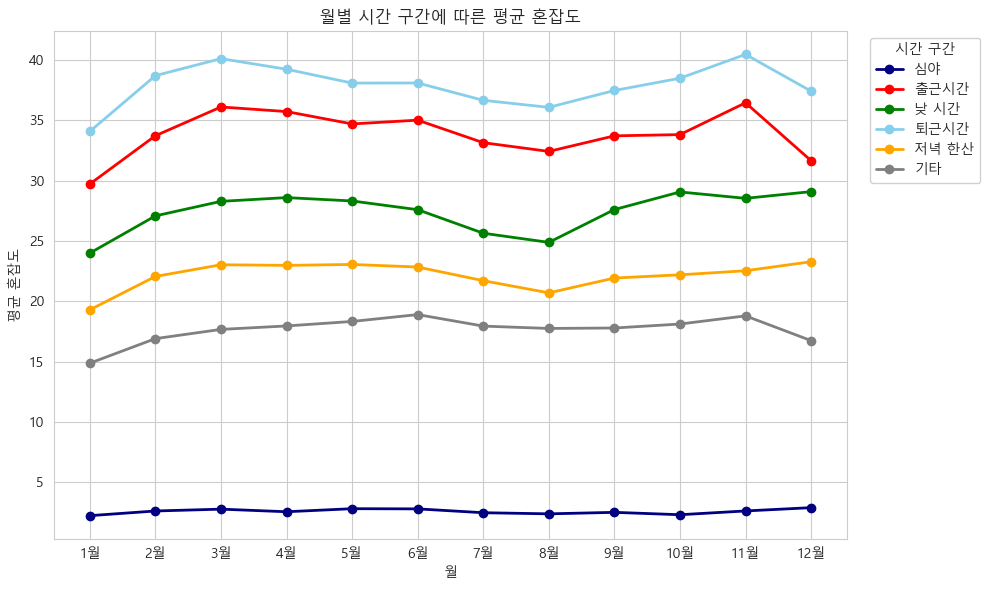

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) ÏãúÍ∞ÑÎåÄ Íµ¨Í∞ÑÌôî (ÏòàÏãú)
conditions = [
    df['ÏãúÍ∞Ñ'].between(0, 1),    # 0‚Äì1Ïãú ‚Üí Ïã¨Ïïº
    df['ÏãúÍ∞Ñ'].between(7, 9),    # 7‚Äì9Ïãú ‚Üí Ï∂úÍ∑ºÏãúÍ∞Ñ
    df['ÏãúÍ∞Ñ'].between(10, 16),  # 10‚Äì16Ïãú ‚Üí ÎÇÆ ÏãúÍ∞Ñ
    df['ÏãúÍ∞Ñ'].between(17, 19),  # 17‚Äì19Ïãú ‚Üí Ìá¥Í∑ºÏãúÍ∞Ñ
    df['ÏãúÍ∞Ñ'].between(20, 23),  # 20‚Äì23Ïãú ‚Üí Ï†ÄÎÖÅ ÌïúÏÇ∞
]
choices = ['Ïã¨Ïïº', 'Ï∂úÍ∑ºÏãúÍ∞Ñ', 'ÎÇÆ ÏãúÍ∞Ñ', 'Ìá¥Í∑ºÏãúÍ∞Ñ', 'Ï†ÄÎÖÅ ÌïúÏÇ∞']
df['ÏãúÍ∞Ñ_Íµ¨Í∞Ñ'] = np.select(conditions, choices, default='Í∏∞ÌÉÄ')

# 2) ÏõîÏùÑ ÏàúÏÑúÌòï Î≤îÏ£ºÎ°ú ÏßÄÏ†ï
month_order = list(range(1, 13))
df['Ïõî'] = pd.Categorical(df['Ïõî'], categories=month_order, ordered=True)

# 3) ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
tab = pd.crosstab(
    index=df['Ïõî'],
    columns=df['ÏãúÍ∞Ñ_Íµ¨Í∞Ñ'],
    values=df['ÌòºÏû°ÎèÑ'],
    aggfunc='mean'
).reindex(index=month_order)

# 4) Ïª¨Îü¨ Îßµ & ÏàúÏÑú Ï†ïÏùò
time_order = ['Ïã¨Ïïº','Ï∂úÍ∑ºÏãúÍ∞Ñ','ÎÇÆ ÏãúÍ∞Ñ','Ìá¥Í∑ºÏãúÍ∞Ñ','Ï†ÄÎÖÅ ÌïúÏÇ∞','Í∏∞ÌÉÄ']
tab = tab.reindex(columns=time_order)  # Ïª¨Îüº ÏàúÏÑú Í≥†Ï†ï

colors = {
    'Ïã¨Ïïº':     'navy',  # ÌååÎûëÌÜ§
    'Ï∂úÍ∑ºÏãúÍ∞Ñ': 'red',  # Îπ®Í∞ïÌÜ§
    'ÎÇÆ ÏãúÍ∞Ñ':  'green',  # Ï¥àÎ°ùÌÜ§
    'Ìá¥Í∑ºÏãúÍ∞Ñ': 'skyblue',  # Î≥¥ÎùºÌÜ§
    'Ï†ÄÎÖÅ ÌïúÏÇ∞':'orange',  # Ï£ºÌô©ÌÜ§
    'Í∏∞ÌÉÄ':     'grey'   # Ï≤≠Î°ùÌÜ§
}

# 5) ÎùºÏù∏ ÌîåÎ°Ø
fig, ax = plt.subplots(figsize=(10, 6))
for seg in time_order:
    ax.plot(
        month_order,
        tab[seg],
        marker='o',
        markersize=6,
        linewidth=2,
        label=seg,
        color=colors[seg]
    )

# 6) xÏ∂ï ÏÑ§Ï†ï
ax.set_xticks(month_order)
ax.set_xticklabels([f'{m}Ïõî' for m in month_order])
ax.set_xlabel('Ïõî')
ax.set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.set_title('ÏõîÎ≥Ñ ÏãúÍ∞Ñ Íµ¨Í∞ÑÏóê Îî∞Î•∏ ÌèâÍ∑† ÌòºÏû°ÎèÑ')
ax.grid(True)

# 7) Î≤îÎ°Ä
ax.legend(
    title='ÏãúÍ∞Ñ Íµ¨Í∞Ñ',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=True,
    framealpha=0.9
)

plt.tight_layout()
plt.show()


# EDA : ÏûêÏó∞Ïû¨Ìï¥ <-> ÏßÄÌïòÏ≤† ÌòºÏû°ÎèÑ 

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  
pd.options.display.float_format = '{:.3f}'.format

ÌòºÏû°ÎèÑ = pd.read_csv('./data/data2.csv', usecols=['ÎÇ†Ïßú','Ïó∞ÏõîÏùº','ÎÖÑ','Ïõî','ÌòºÏû°ÎèÑ'])
ÌÉúÌíç = pd.read_csv('./data/ÏûêÏó∞Ïû¨Ìï¥/ÌÉúÌíç.csv')
Ìè≠Ïóº = pd.read_csv('./data/ÏûêÏó∞Ïû¨Ìï¥/Ìè≠Ïóº.csv')
Ìô©ÏÇ¨ = pd.read_csv('./data/ÏûêÏó∞Ïû¨Ìï¥/Ìô©ÏÇ¨.csv')
ÌïúÌåå = pd.read_excel('./data/ÏûêÏó∞Ïû¨Ìï¥/ÌïúÌåå.xlsx')

Ìè≠Ïóº.columns = ['ÎÇ†Ïßú','Ìè≠ÏóºÌäπÎ≥¥']
Ìô©ÏÇ¨= Ìô©ÏÇ¨['ÏùºÏûê	Ìô©ÏÇ¨Í¥ÄÏ∏°'.split()]
Ìô©ÏÇ¨.columns = ['ÎÇ†Ïßú','Ìô©ÏÇ¨Í¥ÄÏ∏°']
ÌïúÌåå = ÌïúÌåå[['ÏùºÏãú','ÌïúÌååÌäπÎ≥¥(O/X)']]
ÌïúÌåå.columns = ['ÎÇ†Ïßú','ÌïúÌååÌäπÎ≥¥']

ÌòºÏû°ÎèÑ['Ïó∞ÏõîÏùº'] = pd.to_datetime(ÌòºÏû°ÎèÑ['Ïó∞ÏõîÏùº'])
ÌÉúÌíç['ÎÇ†Ïßú'] = pd.to_datetime(ÌÉúÌíç['ÎÇ†Ïßú'])
ÌïúÌåå['ÎÇ†Ïßú'] = pd.to_datetime(ÌïúÌåå['ÎÇ†Ïßú'])
Ìô©ÏÇ¨['ÎÇ†Ïßú'] = pd.to_datetime(Ìô©ÏÇ¨['ÎÇ†Ïßú'])

# 2) left_on / right_on Ï†úÎåÄÎ°ú ÏÇ¨Ïö©Ìï¥ÏÑú Î≥ëÌï©
merged = ÌòºÏû°ÎèÑ.merge(
    ÌÉúÌíç,
    how='left',
    left_on='Ïó∞ÏõîÏùº',
    right_on='ÎÇ†Ïßú')

Ìô©ÏÇ¨['Ìô©ÏÇ¨Í¥ÄÏ∏°'] = np.where(Ìô©ÏÇ¨['Ìô©ÏÇ¨Í¥ÄÏ∏°']=='O', 1, 0)
ÌïúÌåå['ÌïúÌååÌäπÎ≥¥'] = np.where(ÌïúÌåå['ÌïúÌååÌäπÎ≥¥']=='X', 0, 1)

merged= ÌïúÌåå.merge(
    Ìô©ÏÇ¨,
    how='left',
    on='ÎÇ†Ïßú').merge(
    ÌÉúÌíç,
    how='left',
    on='ÎÇ†Ïßú')
merged= merged.fillna(0)
df = ÌòºÏû°ÎèÑ[['Ïó∞ÏõîÏùº','ÌòºÏû°ÎèÑ']].drop_duplicates().reset_index(drop=True)
df = df.groupby('Ïó∞ÏõîÏùº')['ÌòºÏû°ÎèÑ'].mean()
df.shape
merged2 = merged.merge(
    df,
    how='left',
    left_on='ÎÇ†Ïßú',
    right_on='Ïó∞ÏõîÏùº')
merged2 = merged2.drop_duplicates()
merged2 = merged2.dropna()

In [12]:
# Ìú¥ÏùºÏó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
from holidayskr import year_holidays
merged2['ÎÇ†Ïßú'] = pd.to_datetime(merged2['ÎÇ†Ïßú'])
merged2['ÏöîÏùº'] = merged2['ÎÇ†Ïßú'].dt.dayofweek

dates_only1 = [d[0] for d in year_holidays('2021')]
dates_only2 = [d[0] for d in year_holidays('2022')]
dates_only3 = [d[0] for d in year_holidays('2023')]

cond1 = merged2['ÏöîÏùº'].isin([5,6])
cond2 = merged2['ÎÇ†Ïßú'].isin(dates_only1)
cond3 = merged2['ÎÇ†Ïßú'].isin(dates_only2)
cond4 = merged2['ÎÇ†Ïßú'].isin(dates_only3)

cond_total = cond1 | cond2 | cond3 | cond4
merged2['Ìú¥ÏùºÏó¨Î∂Ä'] = cond_total.astype(int)

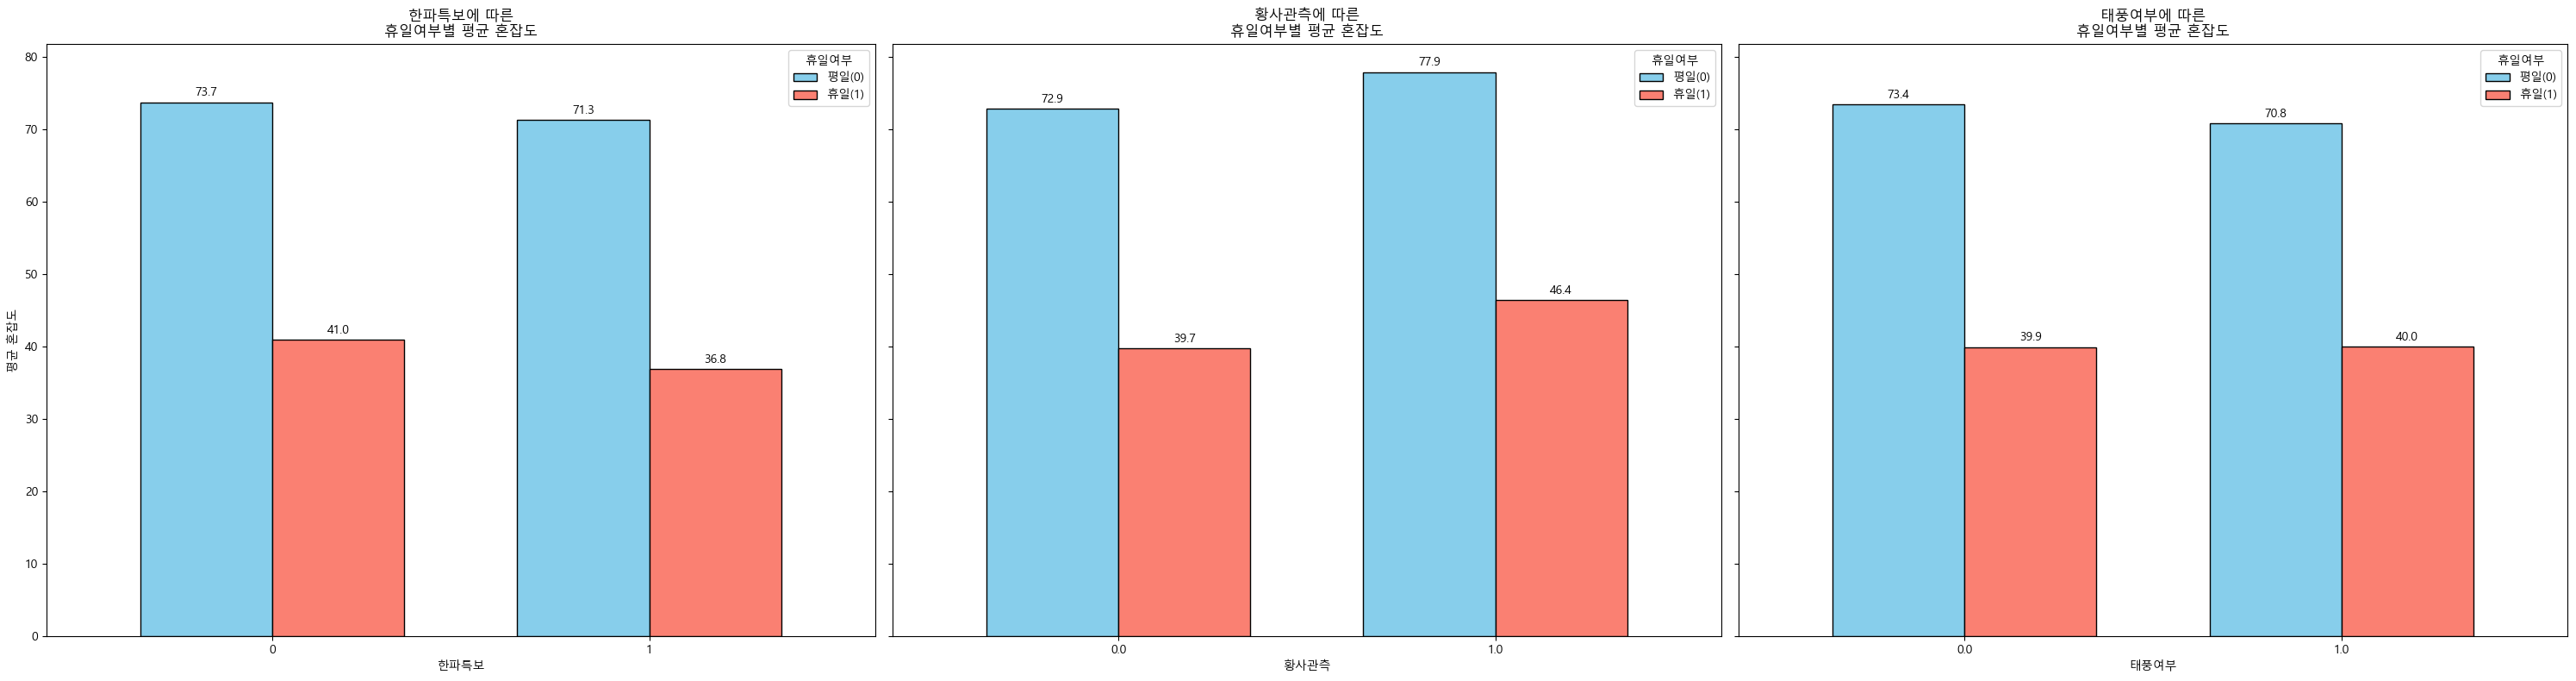

In [16]:
# 1) ÎπÑÍµêÌï† Í∏∞ÏÉÅ Î≥ÄÏàò Î¶¨Ïä§Ìä∏
weather_cols = ['ÌïúÌååÌäπÎ≥¥', 'Ìô©ÏÇ¨Í¥ÄÏ∏°', 'ÌÉúÌíçÏó¨Î∂Ä']

# 2) Ï†ÑÏ≤¥ subplot ÏÑ§Ï†ï
fig, axes = plt.subplots(1, len(weather_cols), figsize=(10 * len(weather_cols), 8), sharey=True)

for ax, col in zip(axes, weather_cols):
    # 3) Ìú¥ÏùºÏó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ Í≥ÑÏÇ∞
    pivot = (
        merged2
        .groupby([col, 'Ìú¥ÏùºÏó¨Î∂Ä'])['ÌòºÏû°ÎèÑ']
        .mean()
        .unstack(fill_value=0)  # Ìú¥ÏùºÏó¨Î∂ÄÍ∞Ä 0,1 Îëê Ïª¨ÎüºÏúºÎ°ú ÌéºÏπòÍ∏∞
    )
    # 4) ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    bars = pivot.plot.bar(
        ax=ax,
        rot=0,
        width=0.7,
        color=['skyblue','salmon'],
        edgecolor='black'
    ).containers
    
    # 5) Í∞í ÎùºÎ≤® ÌëúÏãú
    for bar_container in bars:
        ax.bar_label(bar_container, fmt='%.1f', padding=3)
    
    ax.set_title(f"{col}Ïóê Îî∞Î•∏\nÌú¥ÏùºÏó¨Î∂ÄÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ")
    ax.set_xlabel(col)
    ax.set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
    ax.legend(title='Ìú¥ÏùºÏó¨Î∂Ä', labels=['ÌèâÏùº(0)', 'Ìú¥Ïùº(1)'])

plt.tight_layout()
plt.show()


# EDA : Ïù¥Ïô∏ÏöîÏÜå <-> ÏßÄÌïòÏ≤† ÌòºÏû°ÎèÑ 
- Ïª¨Îüº : ÏöîÏùº, Ìú¥ÏùºÏó¨Î∂Ä, ÏãúÍ∞Ñ, ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò, ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò, Ìò∏ÏÑ†, Ïó≠Î™Ö, ÏÉÅÌïòÍµ¨Î∂Ñ,

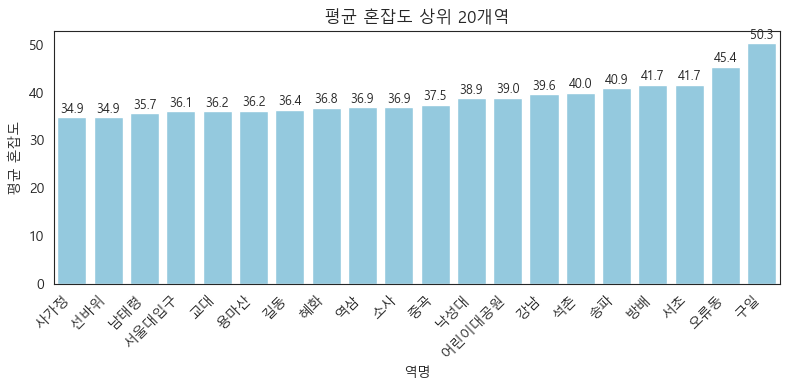

In [188]:
# ÏòàÏãú: col Ïóê Îî∞Îùº Î∞òÎ≥µÌïòÏã§ Îïå
for col in ['Ïó≠Î™Ö']:
    # 1) Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞ & Ï†ïÎ†¨ & ÏÉÅÏúÑ 20Í∞ú ÏÑ†ÌÉù
    data = (
        df.groupby(col)['ÌòºÏû°ÎèÑ']
          .mean()
          .sort_values()
          .reset_index()
          .tail(20)
    )

    # 2) ÌîåÎ°Ø ÏÉùÏÑ±
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(
        x=col,
        y='ÌòºÏû°ÎèÑ',
        data=data,
        color='skyblue'
    )
    ax.set_title(f"ÌèâÍ∑† ÌòºÏû°ÎèÑ ÏÉÅÏúÑ 20Í∞úÏó≠")
    ax.set_xlabel(col)
    ax.set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
    
    # xÏ∂ï Î†àÏù¥Î∏î 45ÎèÑ ÌöåÏ†Ñ
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # 3) ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,  # ÎßâÎåÄ Ï§ëÏïô
            y=height + 0.3,                   # ÎßâÎåÄ ÏúÑÏ™Ω
            s=f"{height:.1f}",                # ÏÜåÏàòÏ†ê 1ÏûêÎ¶¨
            ha='center', va='bottom',
            fontsize=9
        )
    
    plt.tight_layout()
    plt.show()

In [192]:
ÏÉÅÏúÑ20Í∞úÏó≠Î¶¨Ïä§Ìä∏ =data['Ïó≠Î™Ö']
tab = df[df['Ïó≠Î™Ö'].isin(ÏÉÅÏúÑ20Í∞úÏó≠Î¶¨Ïä§Ìä∏)]
pd.crosstab(tab['Ïó≠Î™Ö'], tab['Ìò∏ÏÑ†'])

Ìò∏ÏÑ†          1      2      3      4      5      7      8
Ïó≠Î™Ö                                                     
Í∞ïÎÇ®          0  45360      0      0      0      0      0
ÍµêÎåÄ          0  45360  45360      0      0      0      0
Íµ¨Ïùº      45360      0      0      0      0      0      0
Í∏∏Îèô          0      0      0      0  45360      0      0
ÎÇôÏÑ±ÎåÄ         0  45360      0      0      0      0      0
ÎÇ®ÌÉúÎ†π         0      0      0  45360      0      0      0
Î∞©Î∞∞          0  45360      0      0      0      0      0
ÏÇ¨Í∞ÄÏ†ï         0      0      0      0      0  45360      0
ÏÑúÏö∏ÎåÄÏûÖÍµ¨       0  45360      0      0      0      0      0
ÏÑúÏ¥à          0  45360      0      0      0      0      0
ÏÑùÏ¥å          0      0      0      0      0      0  45360
ÏÑ†Î∞îÏúÑ         0      0      0  45360      0      0      0
ÏÜåÏÇ¨      45360      0      0      0      0      0      0
ÏÜ°Ìåå          0      0      0      0      0      0  45360
Ïñ¥Î¶∞Ïù¥ÎåÄÍ≥µÏõê      0      0      0      0      0  45360      0
Ïó≠ÏÇº          0  45360      0      0      0      0      0
Ïò§Î•òÎèô     45360      0      0      0      0      0      0
Ïö©ÎßàÏÇ∞         0      0      0      0      0  45360      0
Ï§ëÍ≥°          0      0      0      0      0  45360      0
ÌòúÌôî          0      0      0  45360      0      0      0

In [184]:
import numpy as np

for line in sorted(df['Ìò∏ÏÑ†'].unique()):
    # 1) Ìï¥Îãπ Ìò∏ÏÑ†Ïùò Ïó≠Î™Ö unique Î∞∞Ïó¥ ÎΩëÍ∏∞
    stations = df.loc[df['Ìò∏ÏÑ†'] == line, 'Ïó≠Î™Ö'].unique()
    # 2) numpyÎ°ú Ï†ïÎ†¨
    stations_sorted = np.sort(stations)
    
    # Ï∂úÎ†•
    print(f"{line}Ìò∏ÏÑ† ({len(stations_sorted)}Í∞ú):")
    for st in stations_sorted:
        print("  ", st)
    print()

1Ìò∏ÏÑ† (64Í∞ú):
   Í∞ÄÎä•
   Í∞ÑÏÑù
   Í∞úÎ¥â
   Í¥ëÏö¥ÎåÄ
   Íµ¨Î°ú
   Íµ¨Ïùº
   ÎÇ®ÏòÅ
   ÎÖ∏ÎüâÏßÑ
   ÎÖπÏñë
   ÎÖπÏ≤ú
   ÎåÄÎ∞©
   ÎçïÍ≥Ñ
   ÎçïÏ†ï
   ÎèÑÎ¥â
   ÎèÑÎ¥âÏÇ∞
   ÎèÑÏõê
   ÎèÑÌôî
   ÎèôÎåÄÎ¨∏
   ÎèôÎëêÏ≤ú
   ÎèôÎëêÏ≤úÏ§ëÏïô
   ÎèôÎ¨òÏïû
   ÎèôÏïî
   ÎèôÏù∏Ï≤ú
   ÎßùÏõîÏÇ¨
   Î∞©Ìïô
   Î∞±Ïö¥
   Î≥¥ÏÇ∞
   Î∂ÄÍ∞ú
   Î∂ÄÏ≤ú
   Î∂ÄÌèâ
   ÏÑúÏö∏Ïó≠
   ÏÑùÍ≥Ñ
   ÏÜåÏÇ¨
   ÏÜåÏöîÏÇ∞
   ÏÜ°ÎÇ¥
   ÏãúÏ≤≠
   Ïã†Í∏∏
   Ïã†ÎèÑÎ¶º
   Ïã†ÏÑ§Îèô
   Ïã†Ïù¥Î¨∏
   ÏñëÏ£º
   Ïó≠Í≥°
   Ïó∞Ï≤ú
   ÏòÅÎì±Ìè¨
   Ïò§Î•òÎèô
   Ïò®Ïàò
   Ïô∏ÎåÄÏïû
   Ïö©ÏÇ∞
   ÏõîÍ≥Ñ
   ÏùòÏ†ïÎ∂Ä
   Ïù∏Ï≤ú
   Ï†ÑÍ≥°
   Ï†úÍ∏∞Îèô
   Ï†úÎ¨ºÌè¨
   Ï¢ÖÍ∞Å
   Ï¢ÖÎ°ú3Í∞Ä
   Ï¢ÖÎ°ú5Í∞Ä
   Ï£ºÏïà
   Ï§ëÎèô
   ÏßÄÌñâ
   Ï∞ΩÎèô
   Ï≤≠ÎüâÎ¶¨
   ÌöåÍ∏∞
   ÌöåÎ£°

2Ìò∏ÏÑ† (42Í∞ú):
   Í∞ïÎÇ®
   Í∞ïÎ≥Ä
   Í±¥ÎåÄÏûÖÍµ¨
   ÍµêÎåÄ
   Íµ¨Î°úÎîîÏßÄÌÑ∏Îã®ÏßÄ
   Íµ¨Ïùò
   ÎÇôÏÑ±ÎåÄ
   ÎãπÏÇ∞
   ÎåÄÎ¶º
   ÎèôÎåÄÎ¨∏Ïó≠ÏÇ¨Î¨∏ÌôîÍ≥µÏõê
   ÎöùÏÑ¨
   Î¨∏Îûò
   Î∞©Î∞∞
   Î¥âÏ≤ú
   ÏÇ¨Îãπ
   ÏÇºÏÑ±
   ÏÉÅÏôïÏã≠Î¶¨
   ÏÑúÏö∏ÎåÄÏûÖÍµ¨
   ÏÑúÏ¥